# Segmentation based on product

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

## Part1: based on type of vehicles

### EDA on Dataset

In [133]:
df1 = pd.read_csv('/Users/rajdipingale/Downloads/ev_charging.csv')

In [7]:
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [10]:
df1.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


In [12]:
print("Total number of 2 wheeler vehicles: ", df1['2W'].sum())
print("Total number of 3 wheeler vehicles: ", df1['3W'].sum())
print("Total number of 4 wheeler vehicles: ", df1['4W'].sum())

Total number of 2 wheeler vehicles:  202115
Total number of 3 wheeler vehicles:  92476
Total number of 4 wheeler vehicles:  8017


<Axes: xlabel='2W', ylabel='Region'>

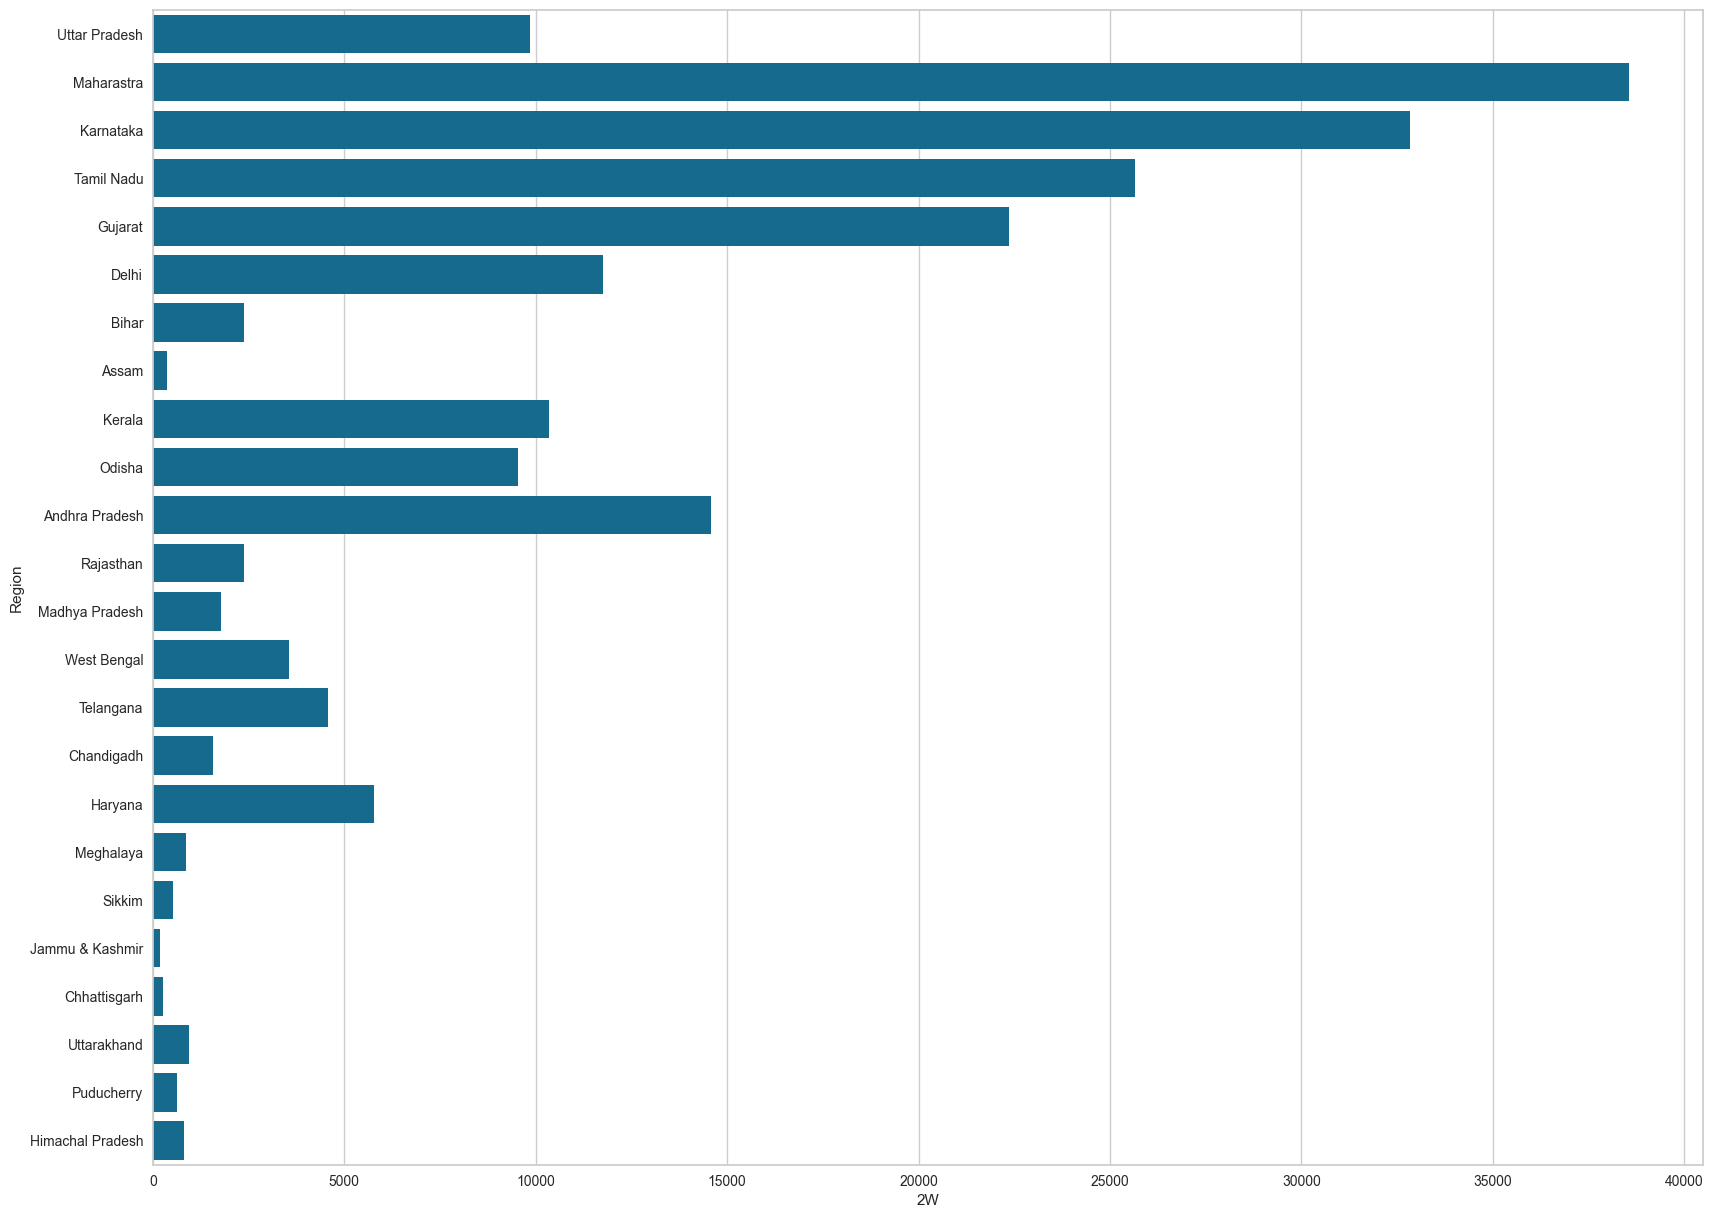

In [135]:
sns.barplot(x="2W", y="Region", data=df1)

<Axes: xlabel='3W', ylabel='Region'>

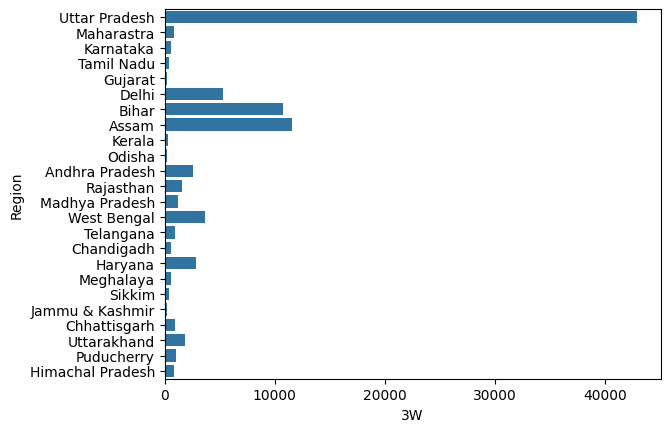

In [14]:
sns.barplot(x="3 Wheelers", y="Region", data=df1)

<Axes: xlabel='4W', ylabel='Region'>

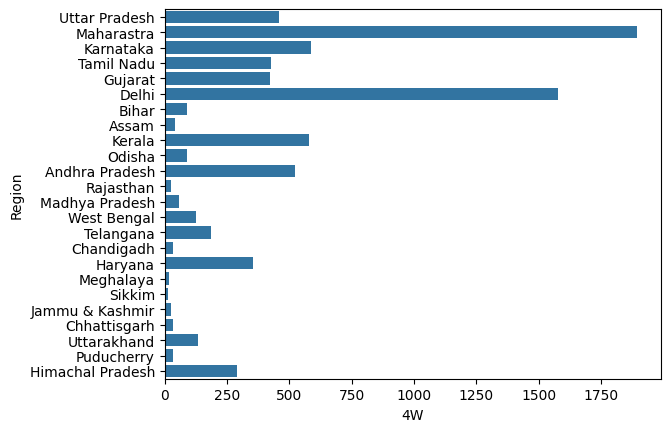

In [15]:
sns.barplot(x="4 Wheelers", y="Region", data=df1)

<Axes: xlabel='Bus', ylabel='Region'>

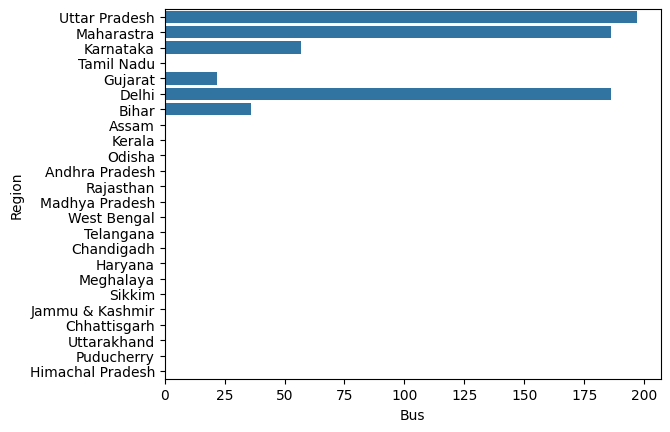

In [16]:
sns.barplot(x="Electric Bus", y="Region", data=df1)

<Axes: xlabel='Chargers', ylabel='Region'>

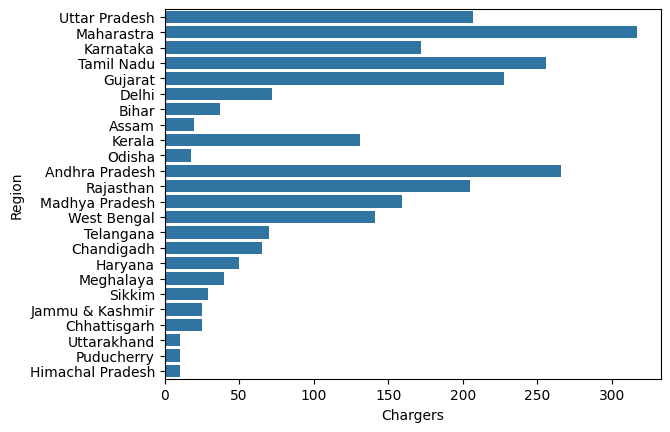

In [17]:
sns.barplot(x="Charging Stations", y="Region", data=df1)

## Unsupervised learning on 1st dataset

K-Means

In [164]:
X = df1[['2W','3W', '4W', 'Chargers']].values

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



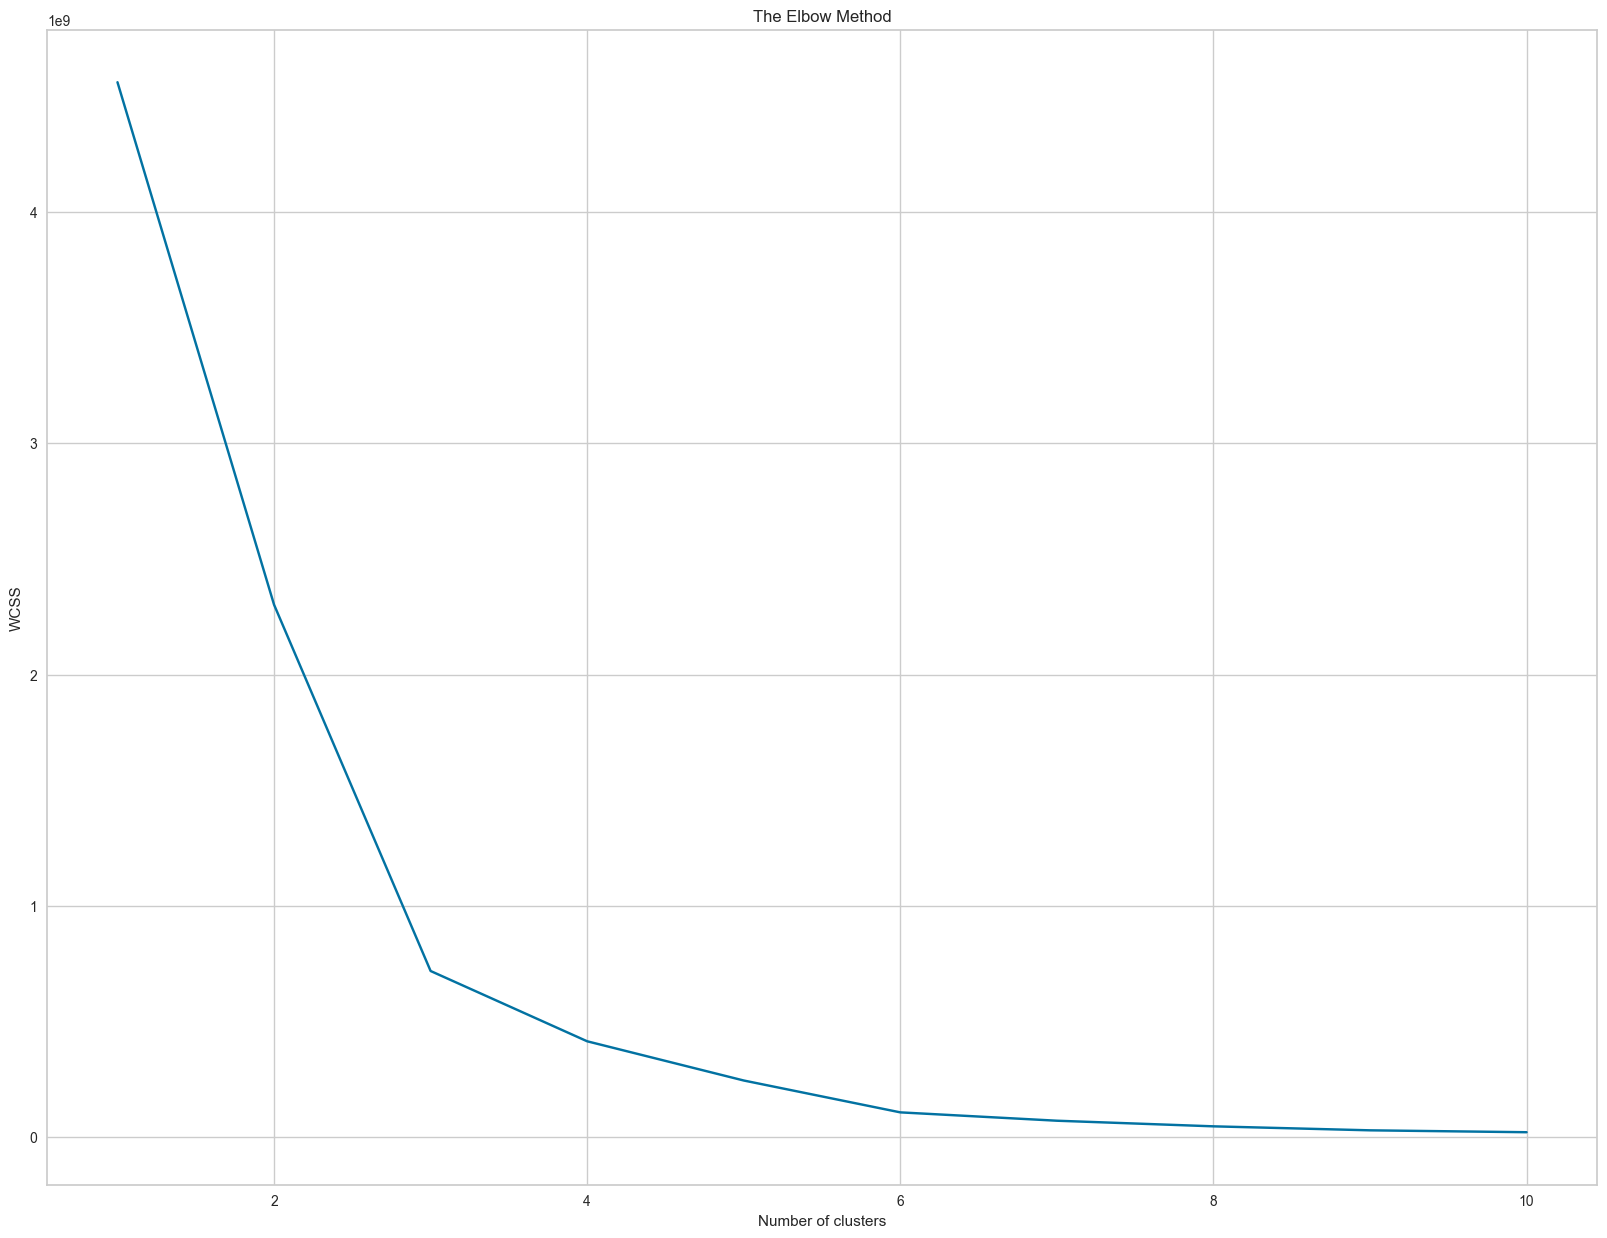

In [142]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [165]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [166]:
y_kmeans = kmeans.labels_
y_kmeans

array([2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [181]:
X1 = pd.DataFrame(X, columns=['2W', '3W' , '4W', 'Charges'])
X1['Cluster'] = y_kmeans


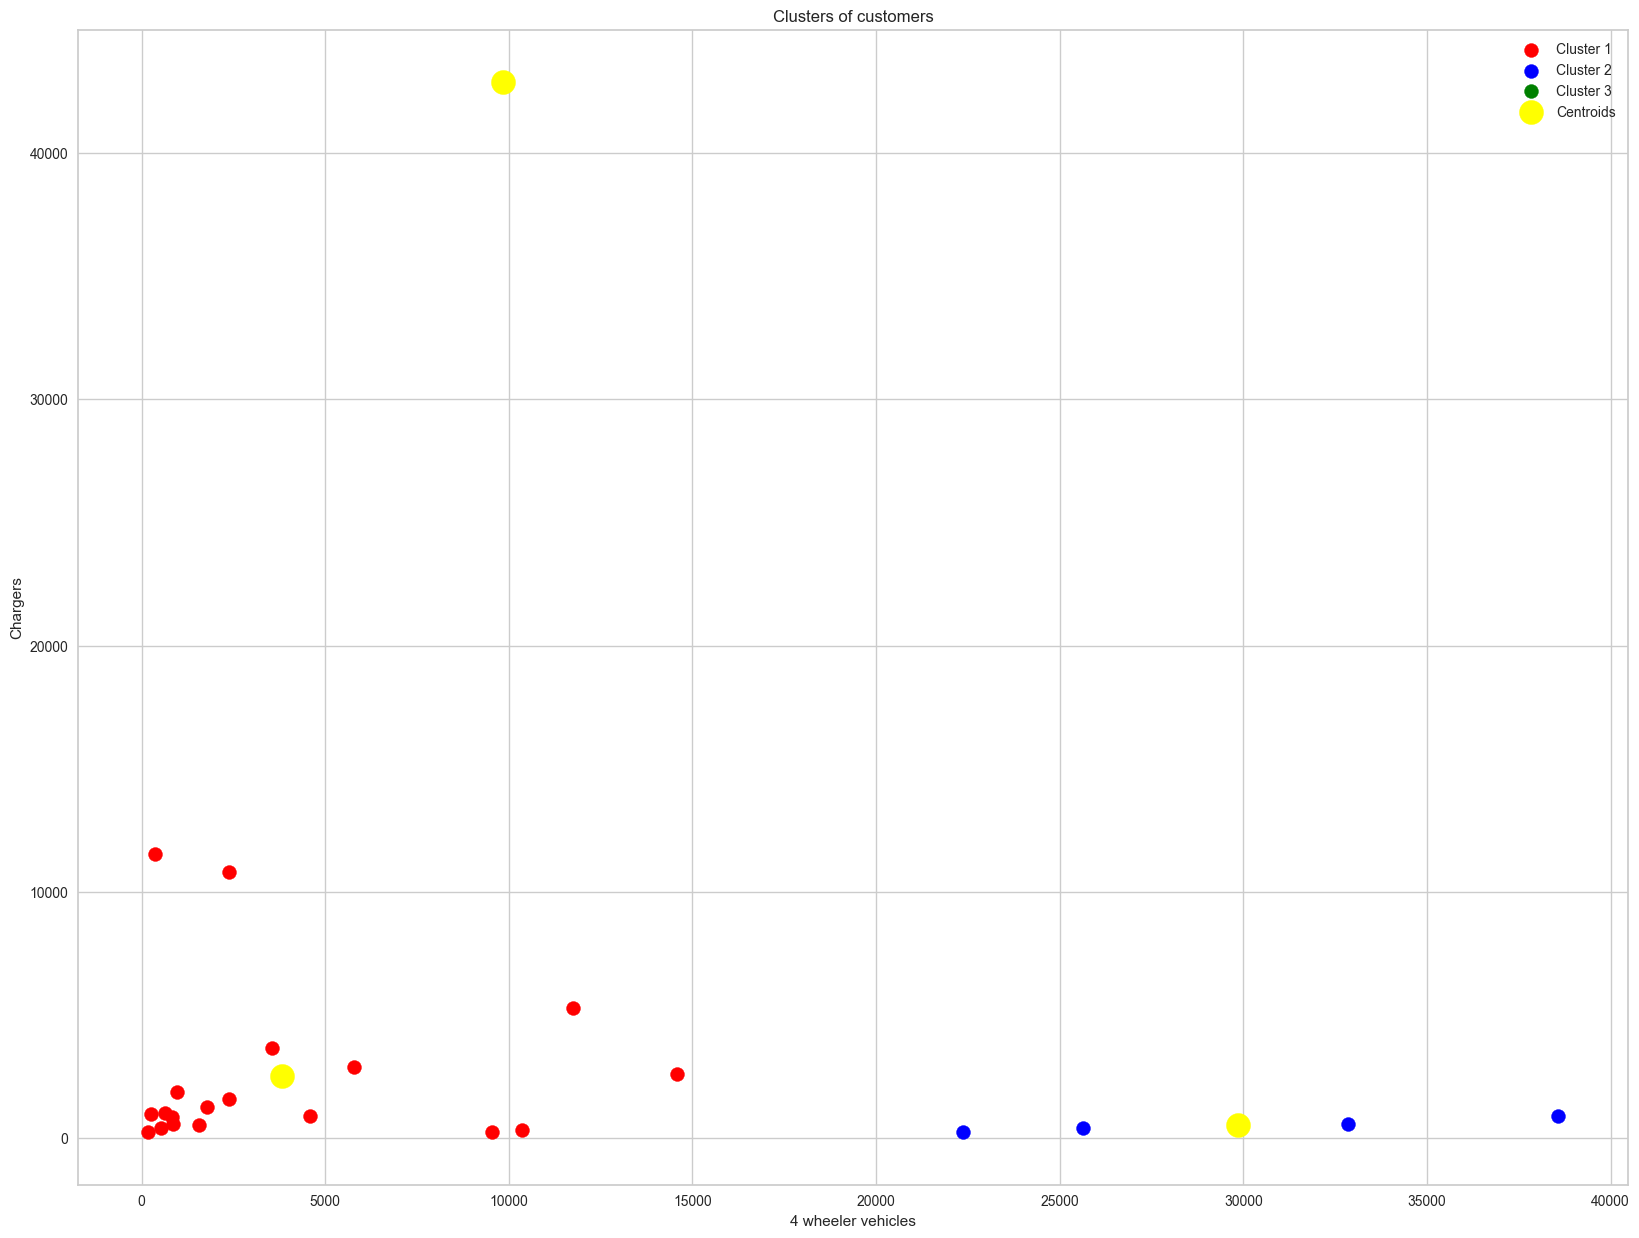

In [167]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('4 wheeler vehicles')
plt.ylabel('Chargers')
plt.legend()
plt.show()

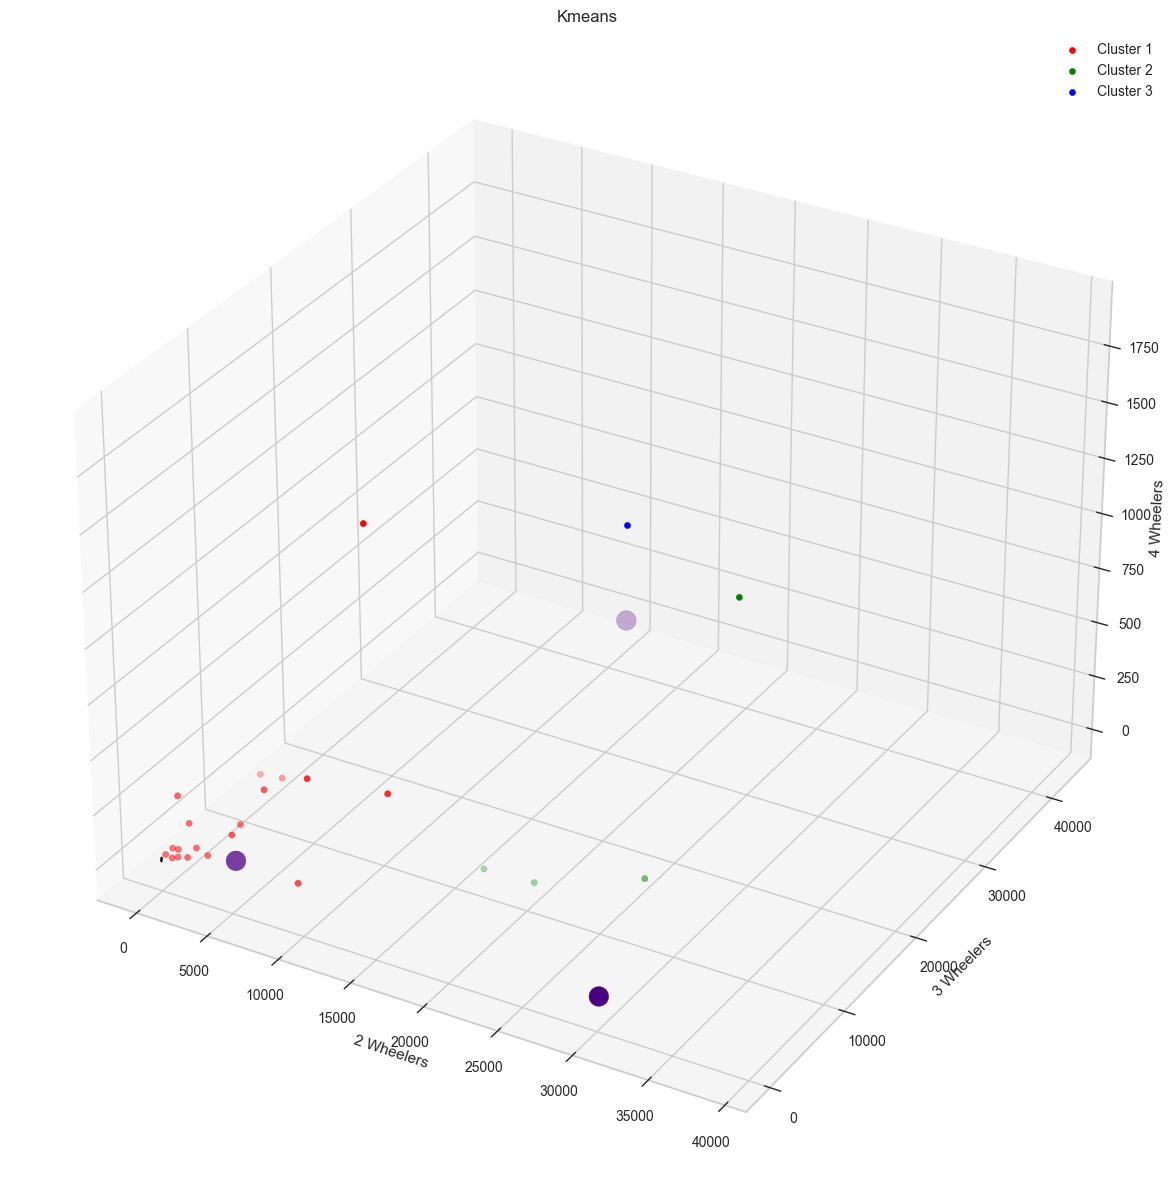

In [184]:
data1 = X1[y_kmeans == 0]
data2 = X1[y_kmeans == 1]
data3 = X1[y_kmeans == 2]
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1['2W'], data1['3W'], data1['4W'], c='red', label='Cluster 1')
kplot.scatter3D(data2['2W'], data2['3W'], data2['4W'], c='green', label='Cluster 2')
kplot.scatter3D(data3['2W'], data3['3W'], data3['4W'], c='blue', label='Cluster 3')
kplot.set_xlabel('2 Wheelers')
kplot.set_ylabel('3 Wheelers')
kplot.set_zlabel('4 Wheelers')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()
     

In [25]:
df1['ClusterLabel'] = y_kmeans+1

In [26]:
df1.head()

,Region,2W,3W,4W,Bus,Chargers,ClusterLabel
0,Uttar Pradesh,9852,42881,458,197,207,3
1,Maharastra,38558,893,1895,186,317,2
2,Karnataka,32844,568,589,57,172,2
3,Tamil Nadu,25642,396,426,0,256,2
4,Gujarat,22359,254,423,22,228,2


In [27]:
labelEncoding = LabelEncoder()
df1['Region'] = labelEncoding.fit_transform(df1['Region'])

In [28]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
df1.head(10)

,Region,2W,3W,4W,Bus,Chargers,ClusterLabel
0,21,9852,42881,458,197,207,3
1,13,38558,893,1895,186,317,2
2,10,32844,568,589,57,172,2
3,19,25642,396,426,0,256,2
4,6,22359,254,423,22,228,2
5,5,11756,5287,1578,186,72,1
6,2,2388,10783,89,36,37,1
7,1,357,11547,42,0,20,1
8,11,10345,308,578,0,131,1
9,15,9540,253,89,0,18,1


In [32]:
df1['Region'].unique()

array([21, 13, 10, 19,  6,  5,  2,  1, 11, 15,  0, 17, 12, 23, 20,  3,  7,
       14, 18,  9,  4, 22, 16,  8])

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[4 1]
 [0 0]]


0.8

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
accuracy_score(y_train, y_pred)

[[13  1  0]
 [ 0  4  0]
 [ 0  0  1]]


0.9473684210526315

/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_35972/3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


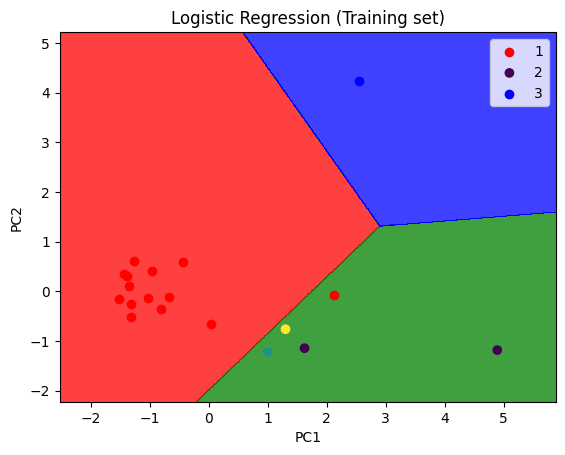

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_35972/3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


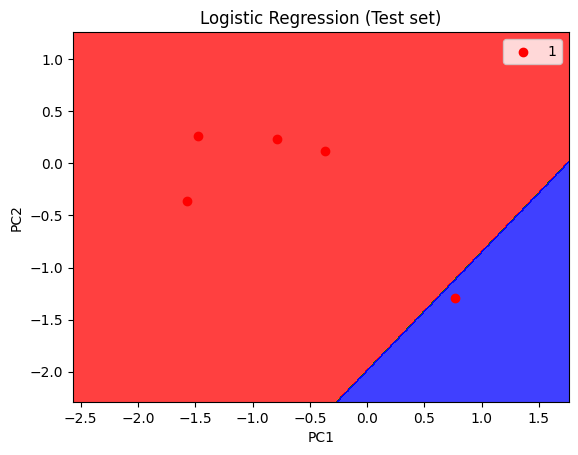

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Dataset 2

In [ ]:
pip install kale
pip install openpyxl
pip install yellowbrick

In [56]:
df = pd.read_excel('/Users/rajdipingale/Downloads/ev_market_india_data.xlsx')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [58]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

In [59]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,444.2718,0.7476,4.8835,55811.5631,4643.5221
std,3.0174,43.5730,126.0144,29.5668,203.9493,0.4365,0.7958,34134.6653,2840.0042
min,2.1000,123.0000,95.0000,104.0000,170.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,168.0000,260.0000,0.5000,5.0000,34429.5000,2864.5344
50%,7.3000,160.0000,340.0000,180.0000,440.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,203.0000,555.0000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,273.0000,940.0000,1.0000,7.0000,215000.0000,17888.0000


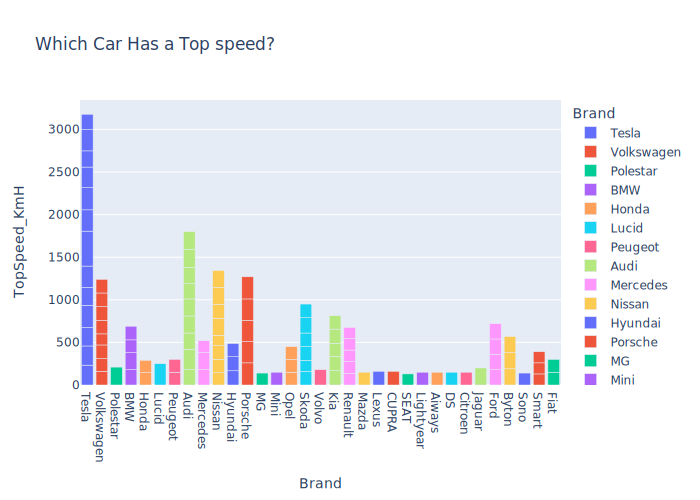

In [60]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

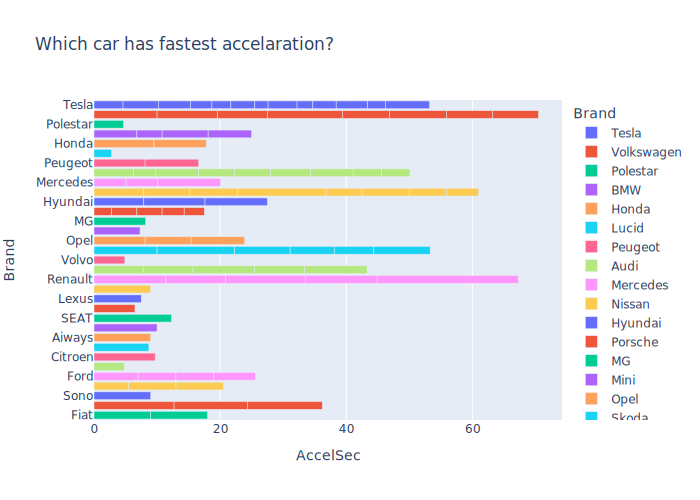

In [61]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

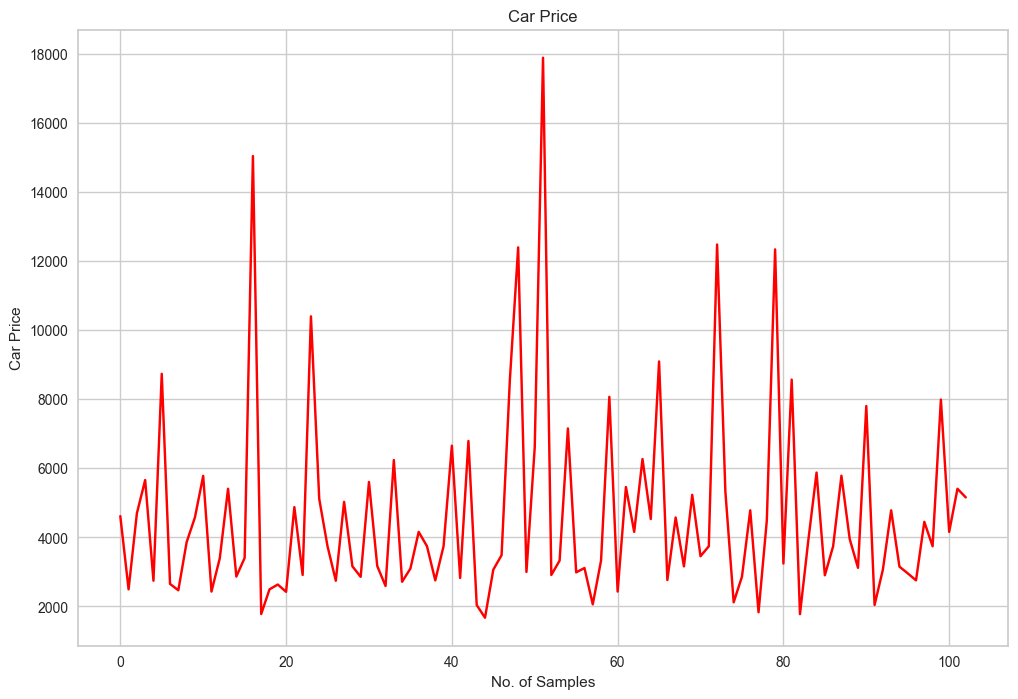

In [62]:
df['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

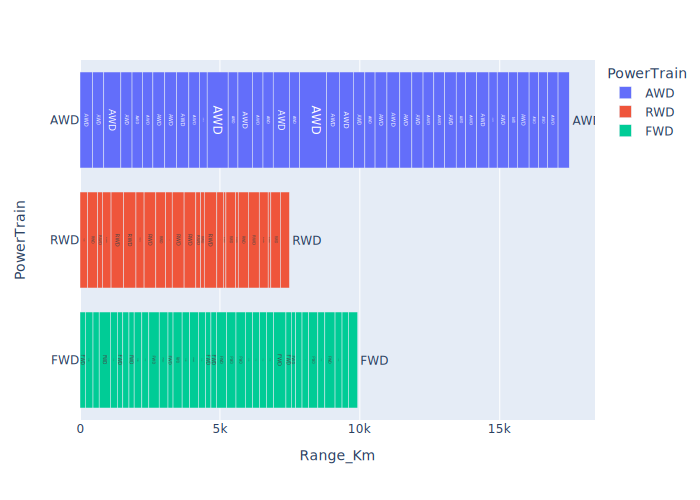

In [63]:
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

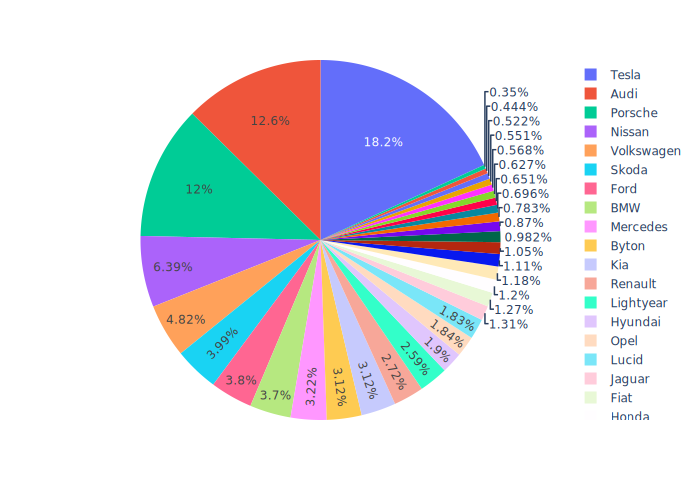

In [64]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

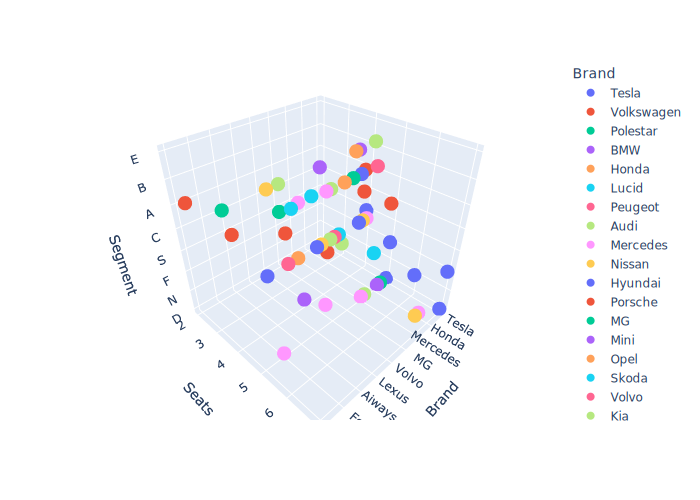

In [66]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
pio.show(fig)

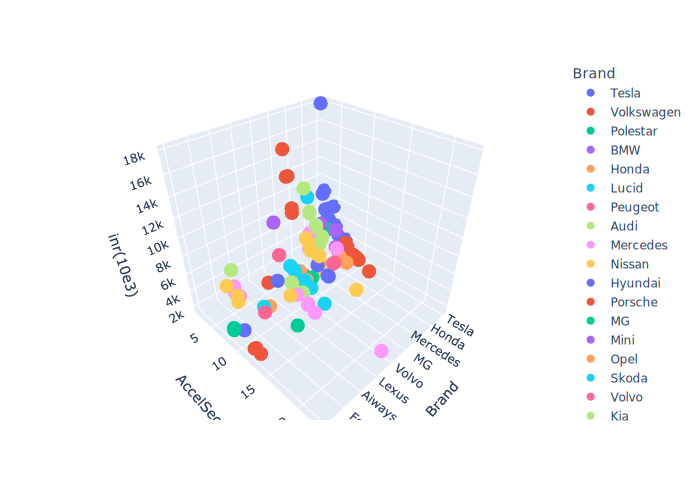

In [67]:
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'inr(10e3)',color = 'Brand')
pio.show(fig)

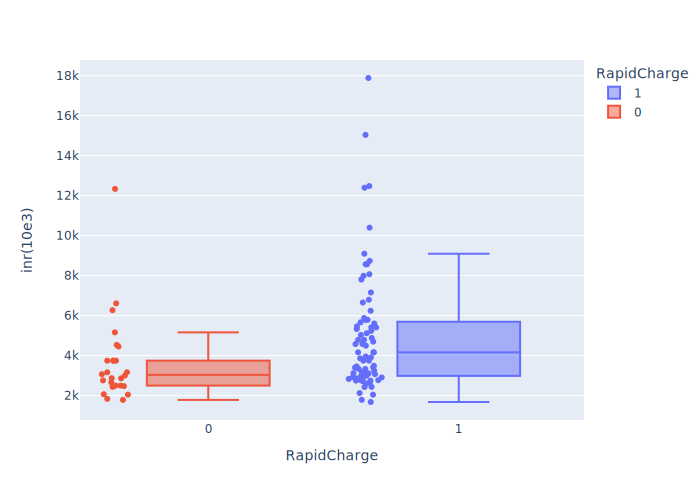

In [68]:
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)

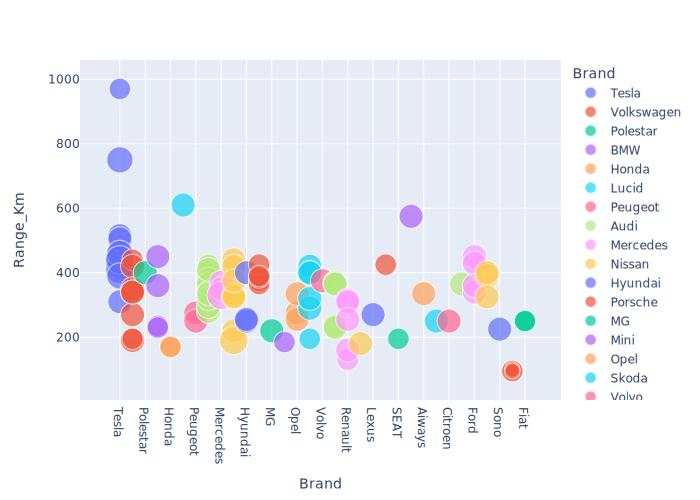

In [69]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

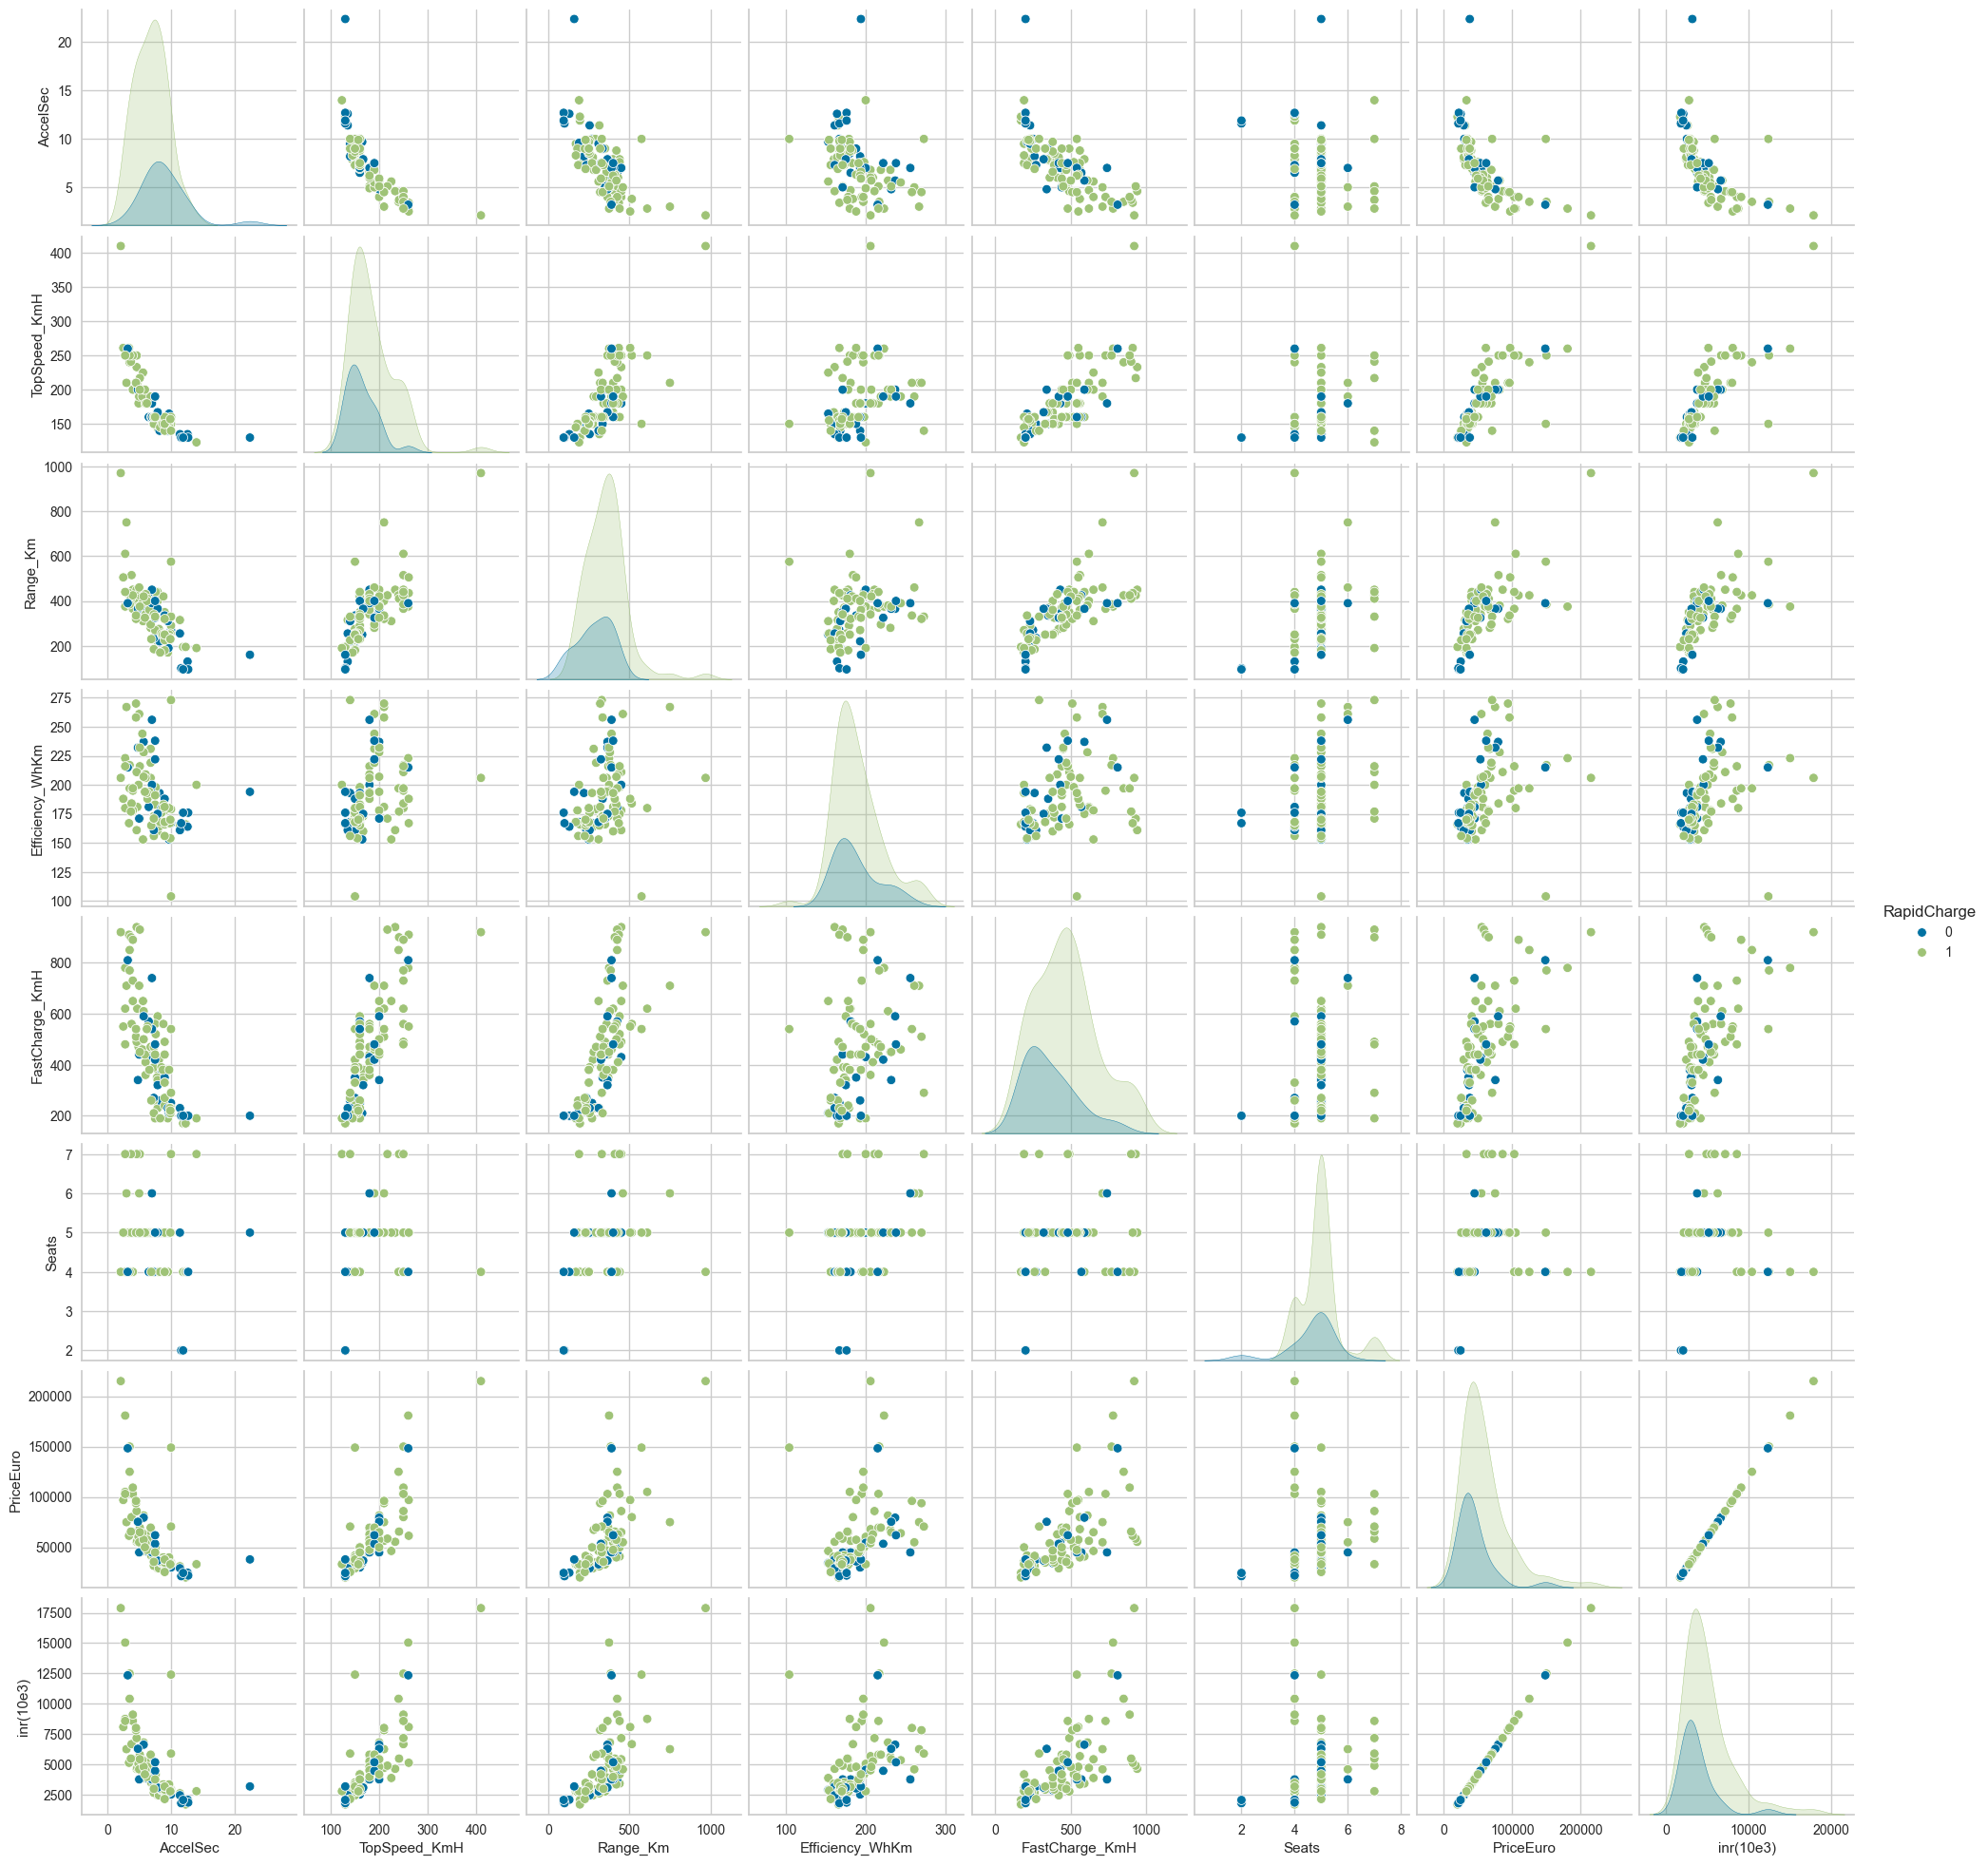

In [70]:
sb.pairplot(df,hue='RapidCharge')

In [73]:
a=np.arange(1,104)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

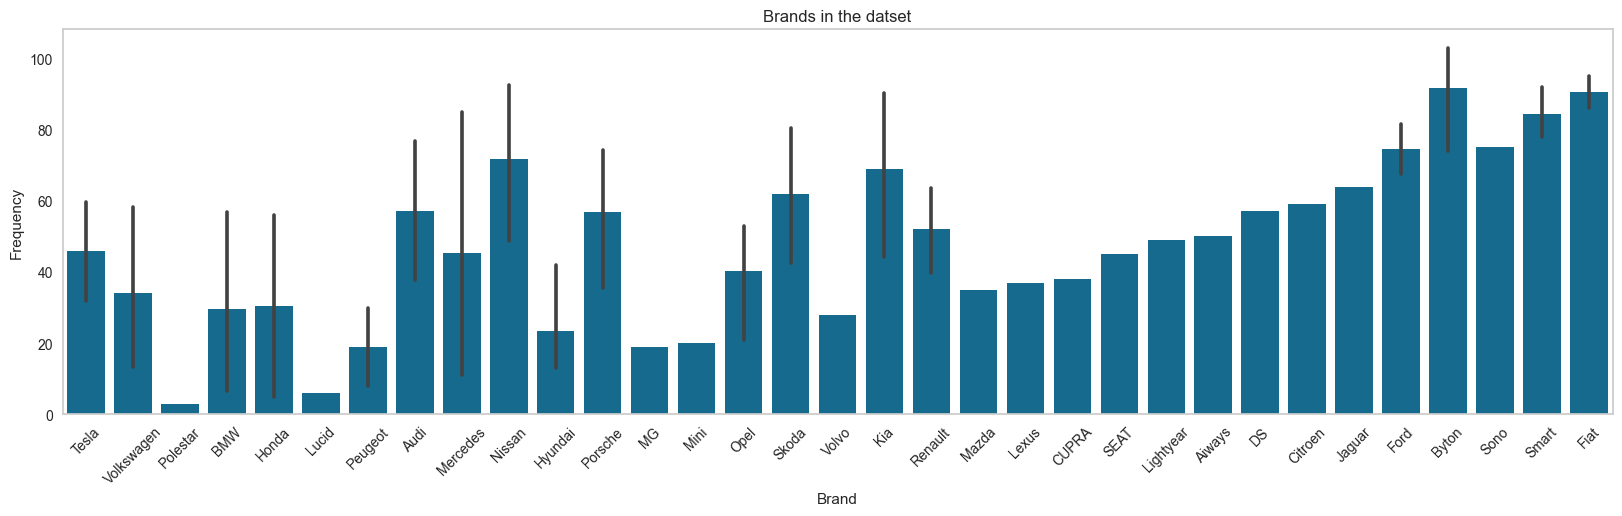

In [74]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton , Fiat and smart are the prominent brands and Polestar being the least


## Top speeds achieved by the cars of a brand

/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_35972/3803754215.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

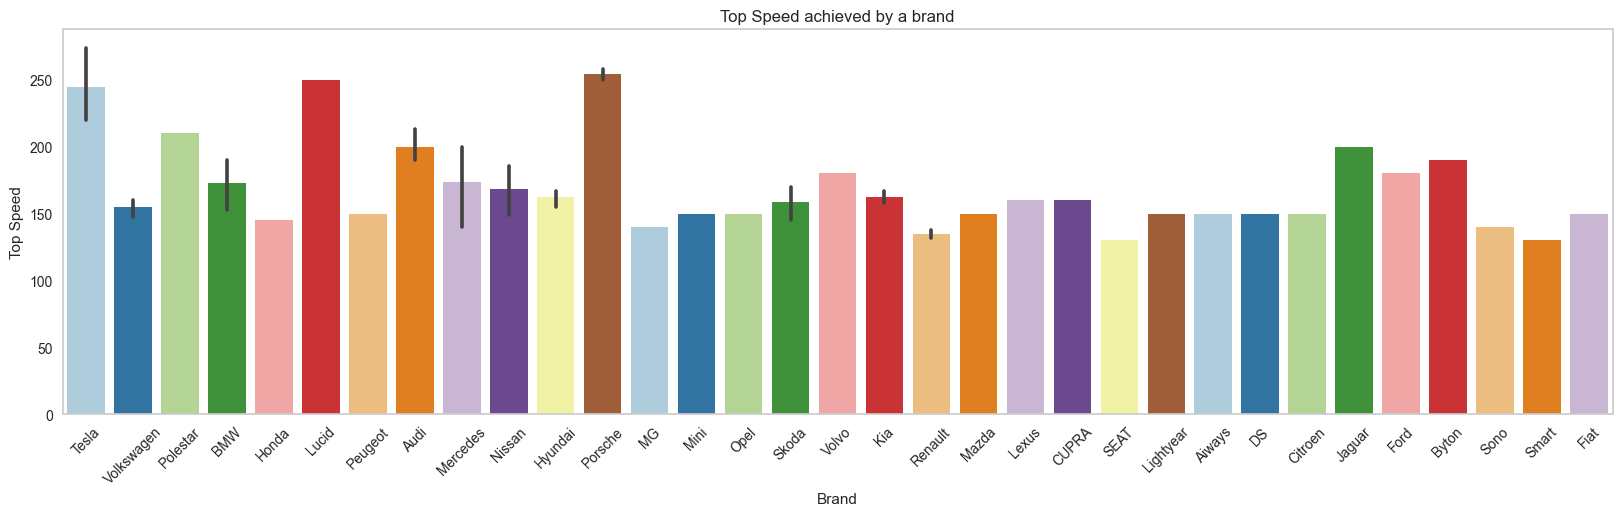

In [75]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest


## Range a car can achieve

/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_35972/86823407.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

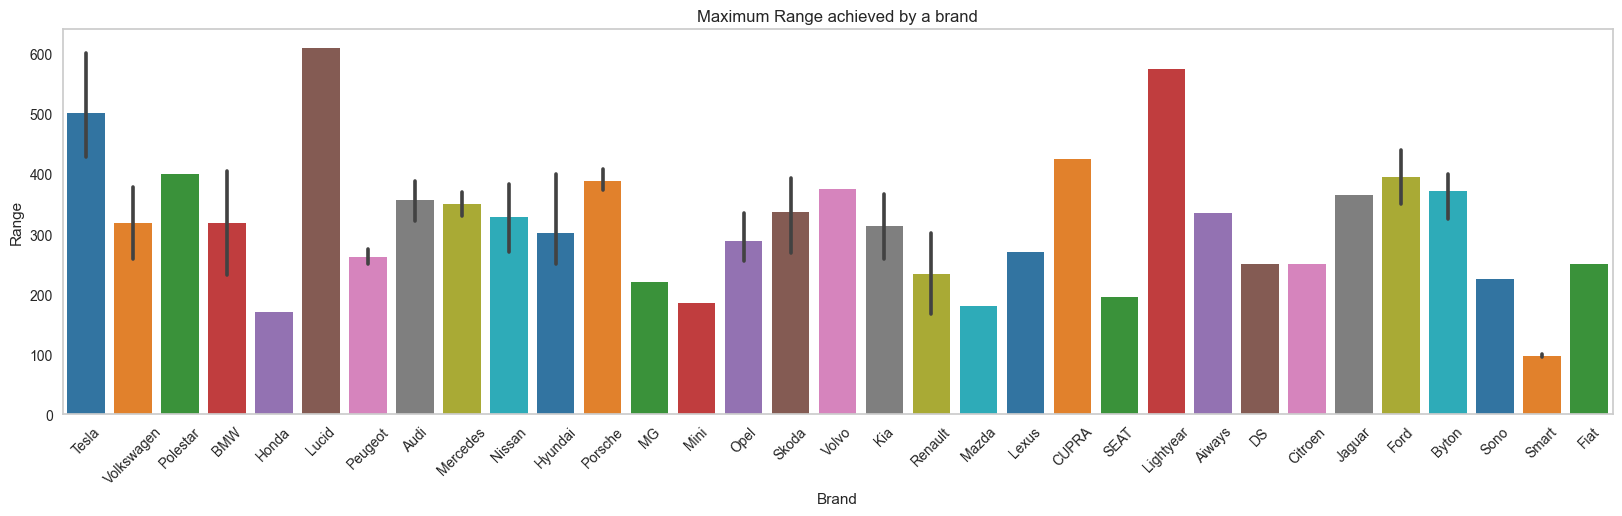

In [76]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

## Car efficiency

/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_35972/4084309128.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

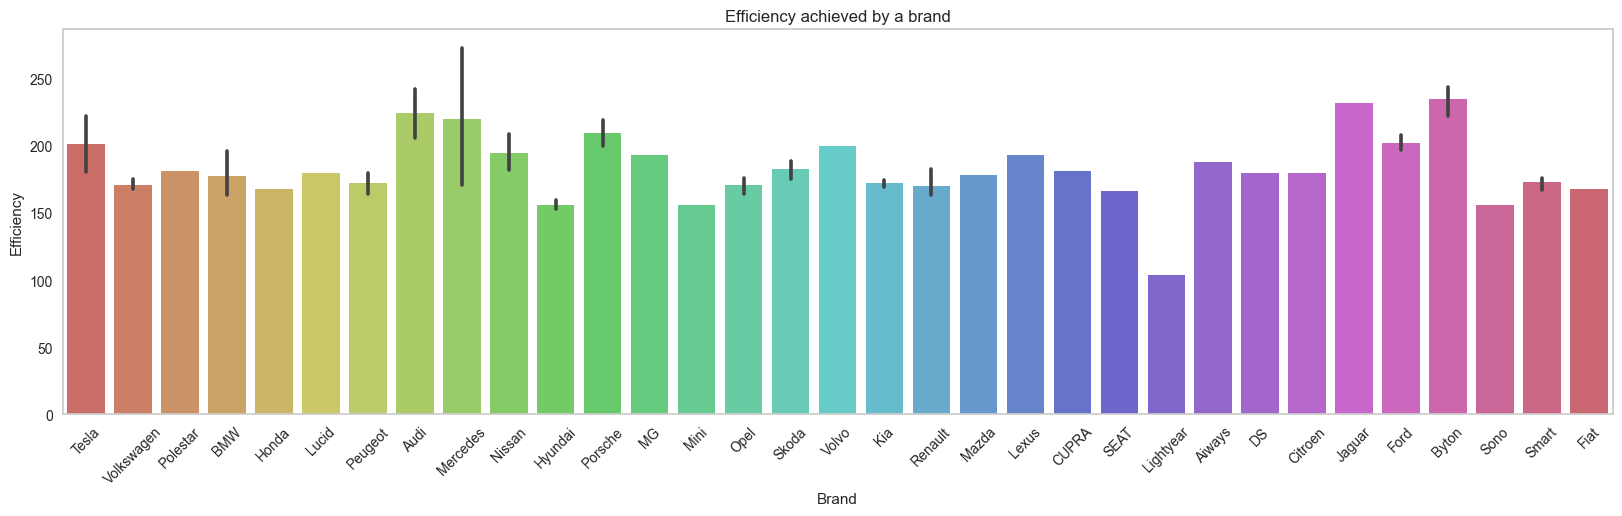

In [77]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

## Type of Plug used for charging

Text(0.5, 1.0, 'Plug Type')

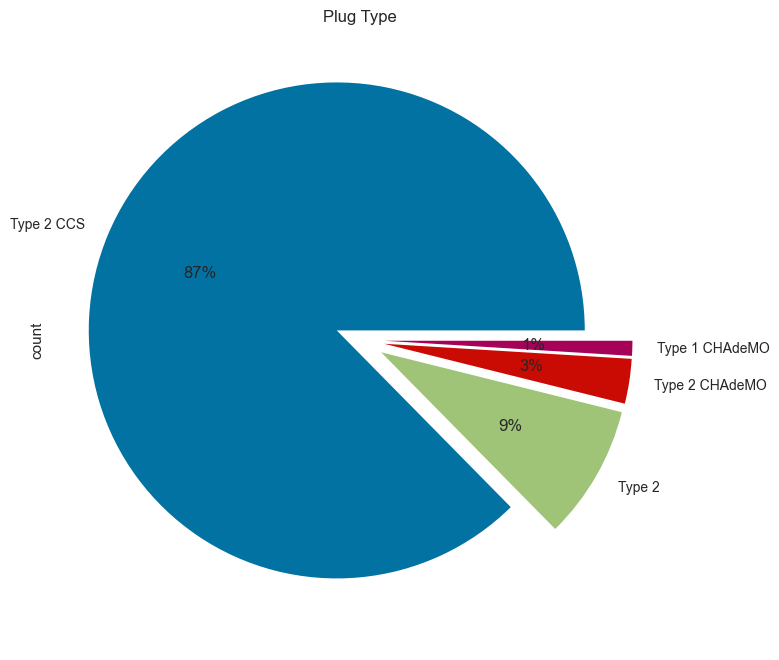

In [78]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHAdeMo the least

## Cars and their body style

Text(0.5, 1.0, 'Body Style')

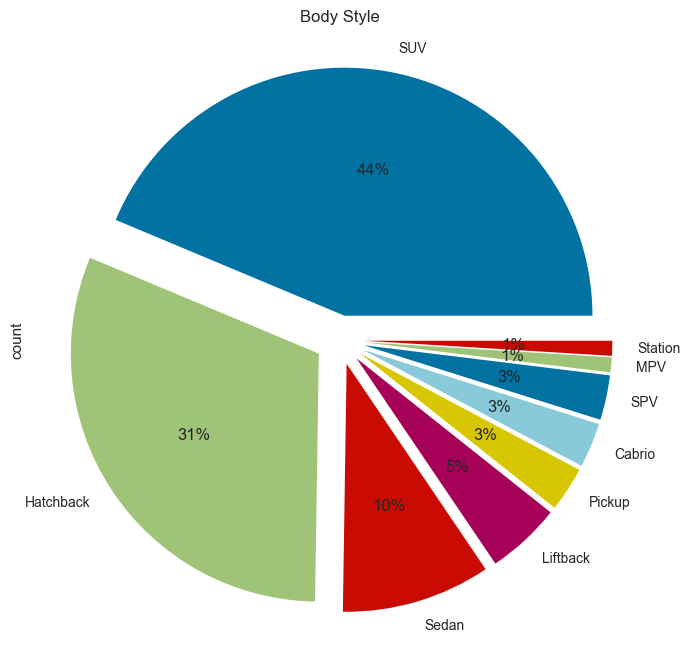

In [79]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are eiher SUV or Hatchback

## Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

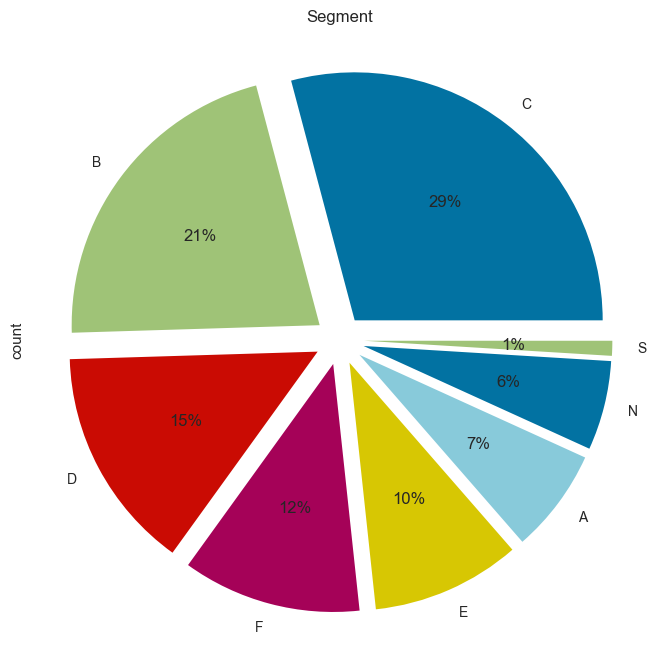

In [81]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type

## Number of Seats

Text(0.5, 1.0, 'Seats')

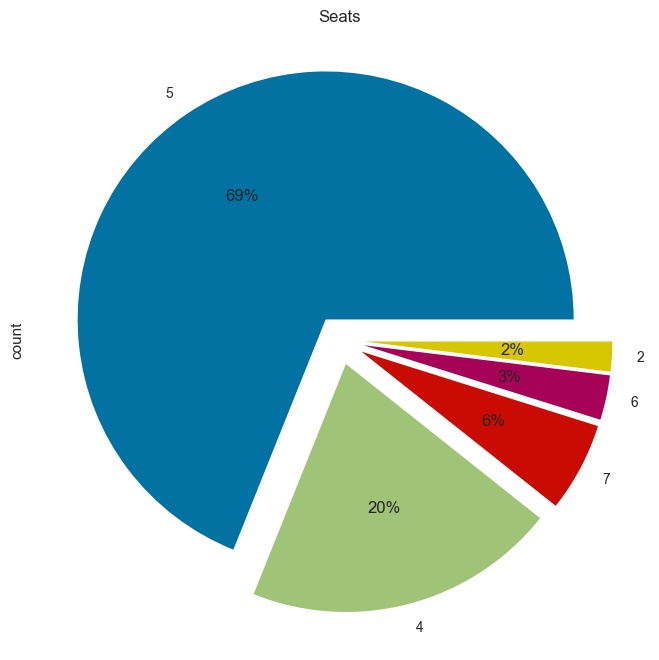

In [82]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

In [83]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [84]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

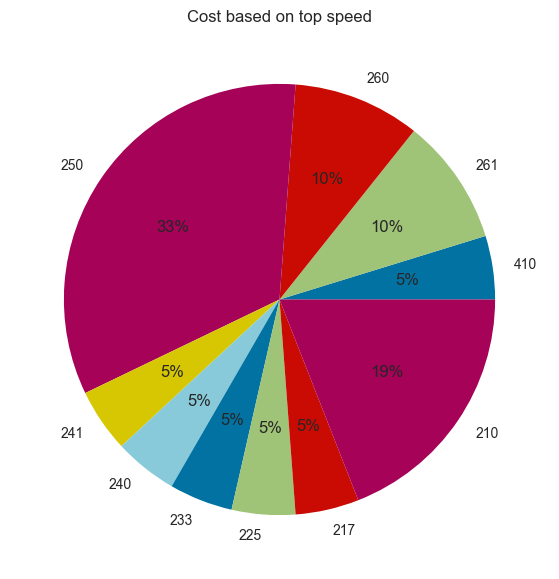

In [85]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

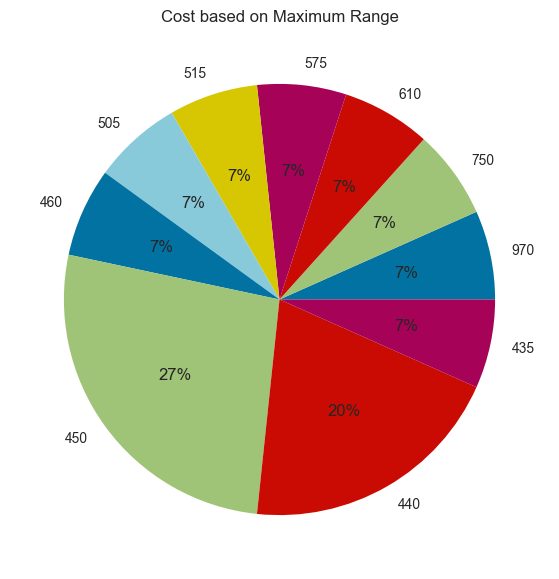

In [86]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

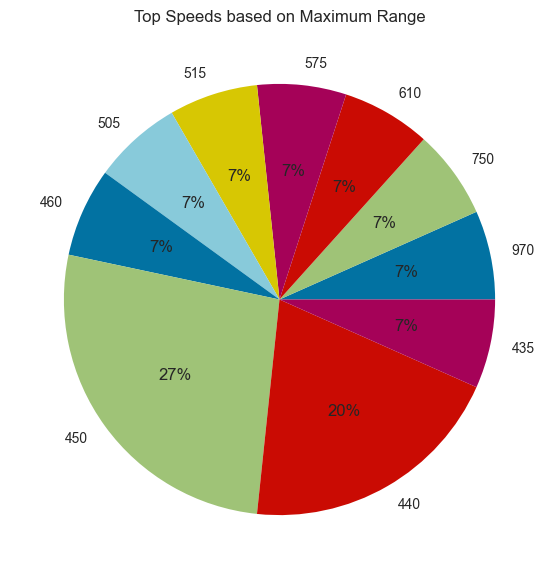

In [87]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# Clustering

In [204]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [104]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.4292,-0.5546,-1.1478,-0.8828,0.8400,-0.9593,0.9989,0.7111,-0.3967
1,-2.3225,-0.3454,0.8965,-1.3055,0.0796,0.2351,-0.2137,-0.5441,-0.1819
2,1.5879,0.0089,-0.6505,0.0410,0.5935,-0.6982,0.0587,0.2488,-0.2028
3,0.2910,-0.0001,-0.3077,-0.5142,-1.6089,0.2916,0.3650,-0.2355,0.2617
4,-2.6027,-0.6265,-0.8881,0.5853,-0.8021,0.0274,-0.0850,-0.5078,-0.0499
...,...,...,...,...,...,...,...,...,...
98,-0.2972,0.4467,-0.4636,0.1025,-0.3460,-0.1005,0.0311,0.2023,0.1454
99,2.3350,0.6307,0.9859,1.5601,-0.8173,-0.1219,0.1641,-0.2557,0.1410
100,0.7806,0.4268,-0.2986,0.7086,0.4817,-0.5401,-0.1398,-0.0487,-0.3675
101,1.5409,0.6988,0.4224,1.0949,-0.2981,-0.3080,-0.3632,0.1273,-0.1904


In [105]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.4292,-0.5546,-1.1478,-0.8828,0.8400,-0.9593,0.9989,0.7111,-0.3967
1,-2.3225,-0.3454,0.8965,-1.3055,0.0796,0.2351,-0.2137,-0.5441,-0.1819
2,1.5879,0.0089,-0.6505,0.0410,0.5935,-0.6982,0.0587,0.2488,-0.2028


In [106]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.3964,0.0862,0.0648,0.0583,0.1445,0.6769,0.4125,0.2707,-0.3246
PC2,0.4220,-0.2168,0.0023,-0.0685,0.0382,0.0452,0.0376,-0.4138,-0.7708
PC3,0.2383,0.3309,0.5718,0.3805,-0.5751,0.0249,0.0047,0.1442,-0.0990
PC4,0.3945,-0.1384,-0.0477,-0.2965,-0.0924,-0.2379,0.7282,0.3584,0.1057
Pc5,0.1572,0.2699,-0.8033,0.3953,-0.2926,0.0870,0.0539,0.0408,-0.0561
PC6,0.3895,-0.0247,-0.0763,-0.3871,-0.0328,0.3645,-0.5208,0.5342,-0.0380
PC7,0.1404,0.8013,0.0195,-0.4290,0.1653,0.0867,0.0984,-0.3208,0.0800
PC8,0.3898,-0.2623,0.0738,0.1799,0.0433,0.5587,0.1180,-0.3821,0.5172
PC9,0.3229,0.1805,0.0983,0.4866,0.7228,-0.1499,-0.0191,0.2653,-0.0333


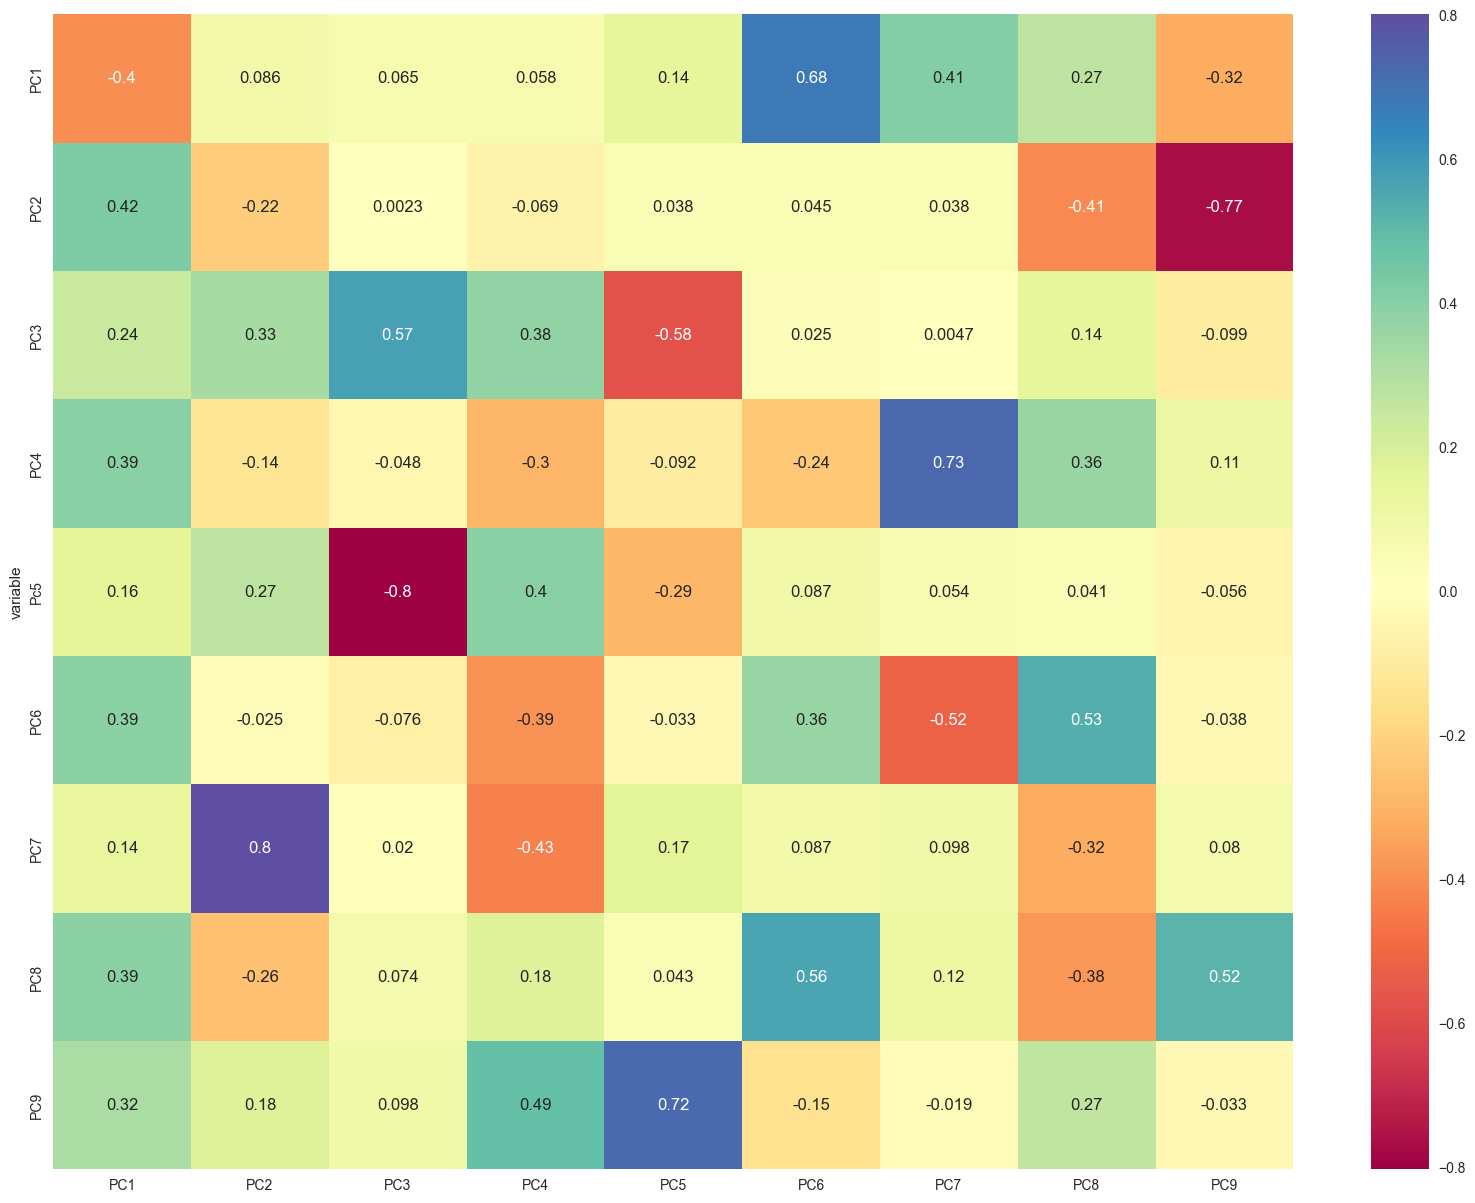

In [107]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

### Heirarchical Clustering

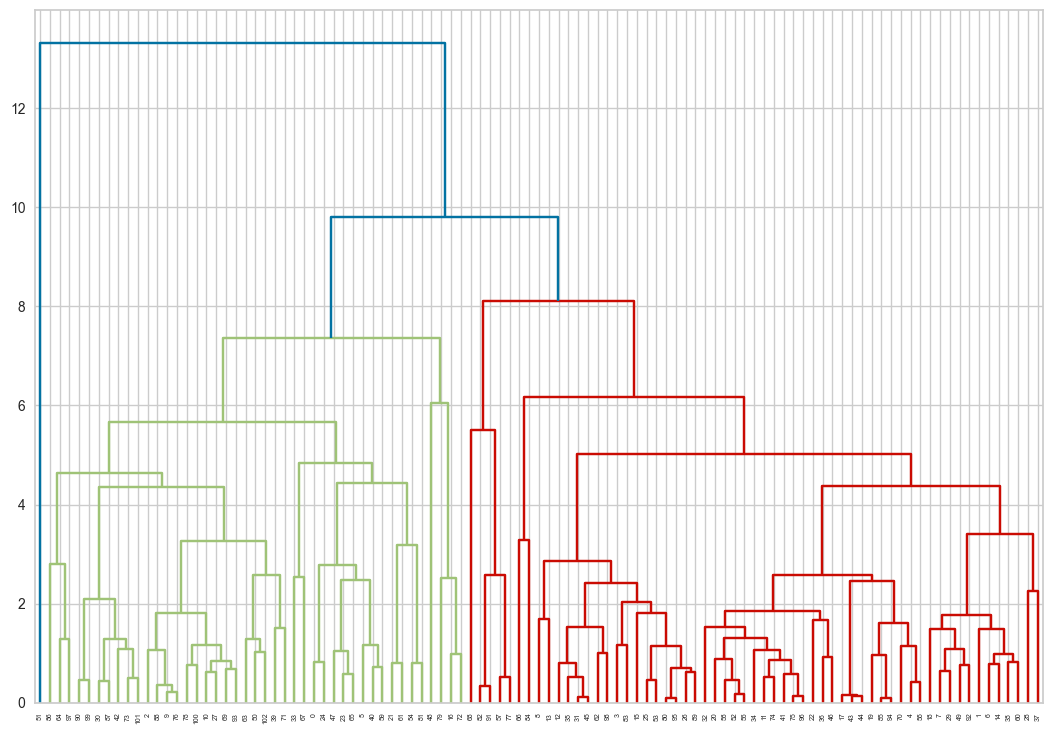

In [186]:
linked = linkage(x, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

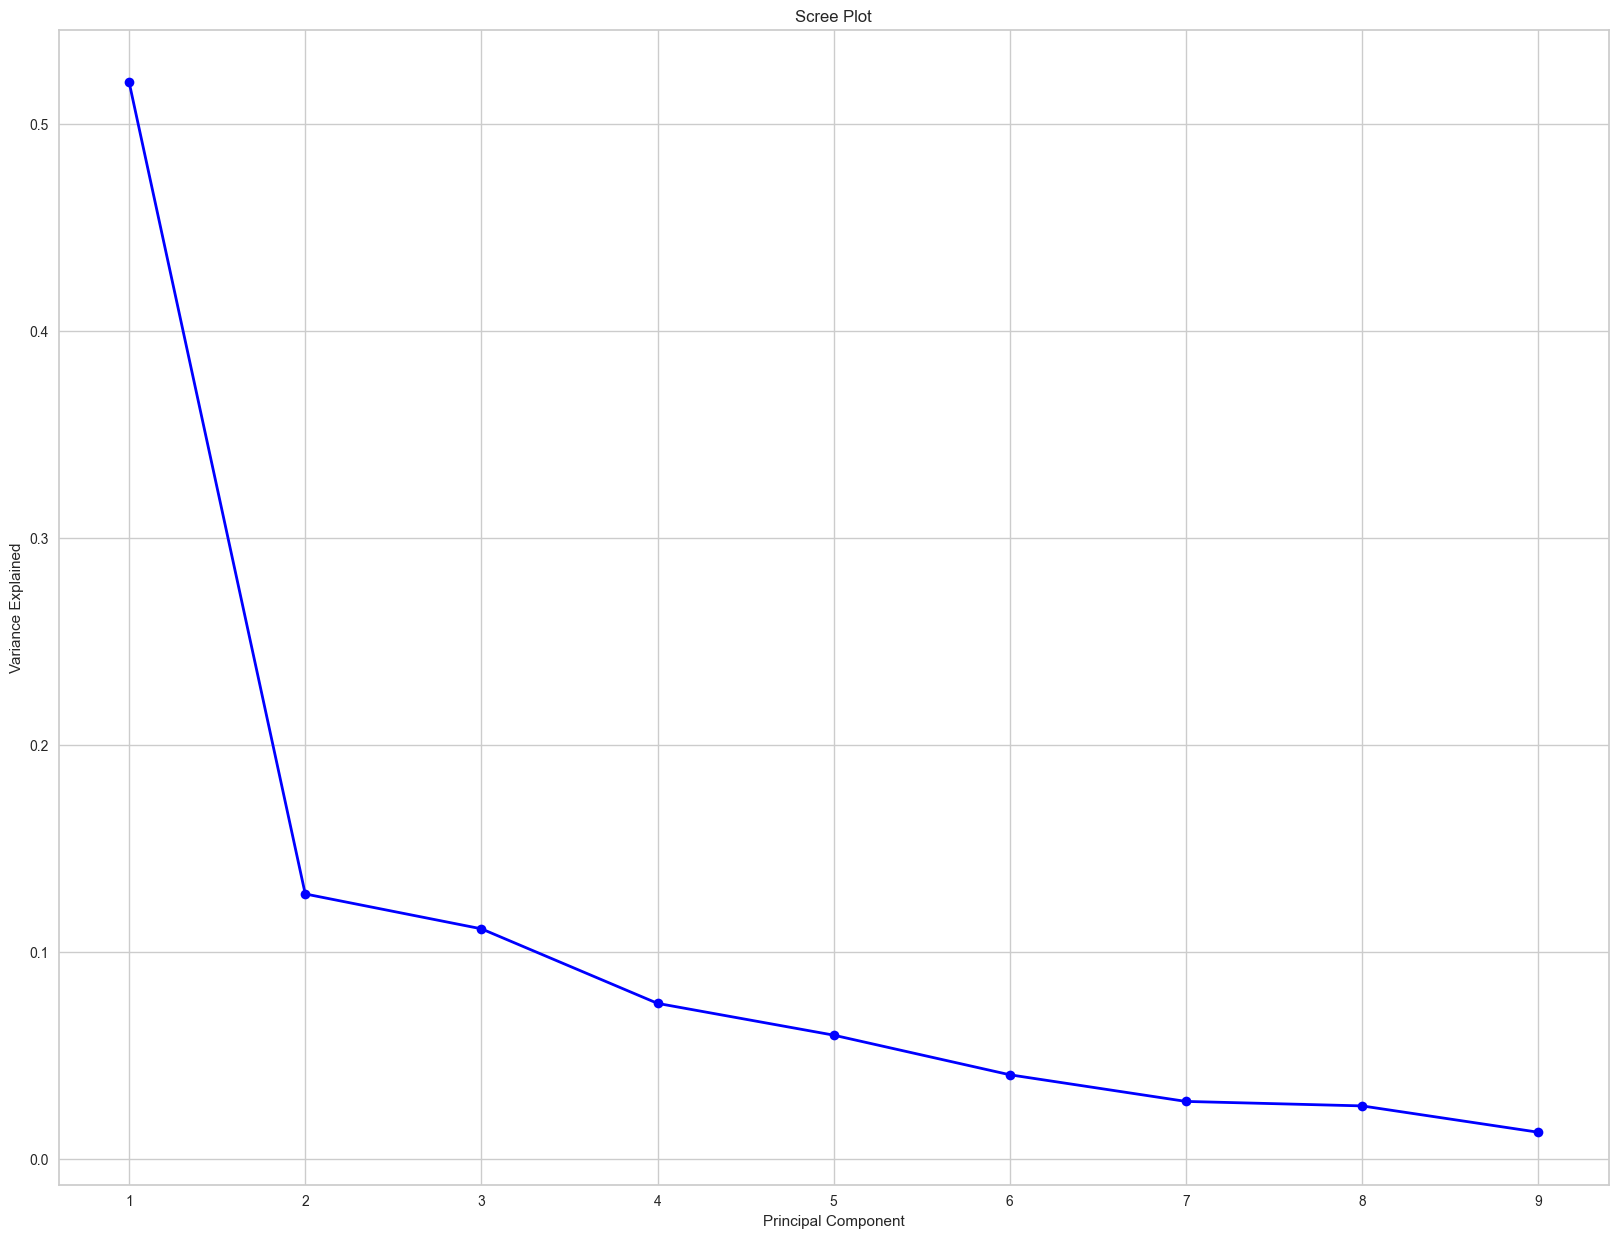

In [109]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### K Means Clustering

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



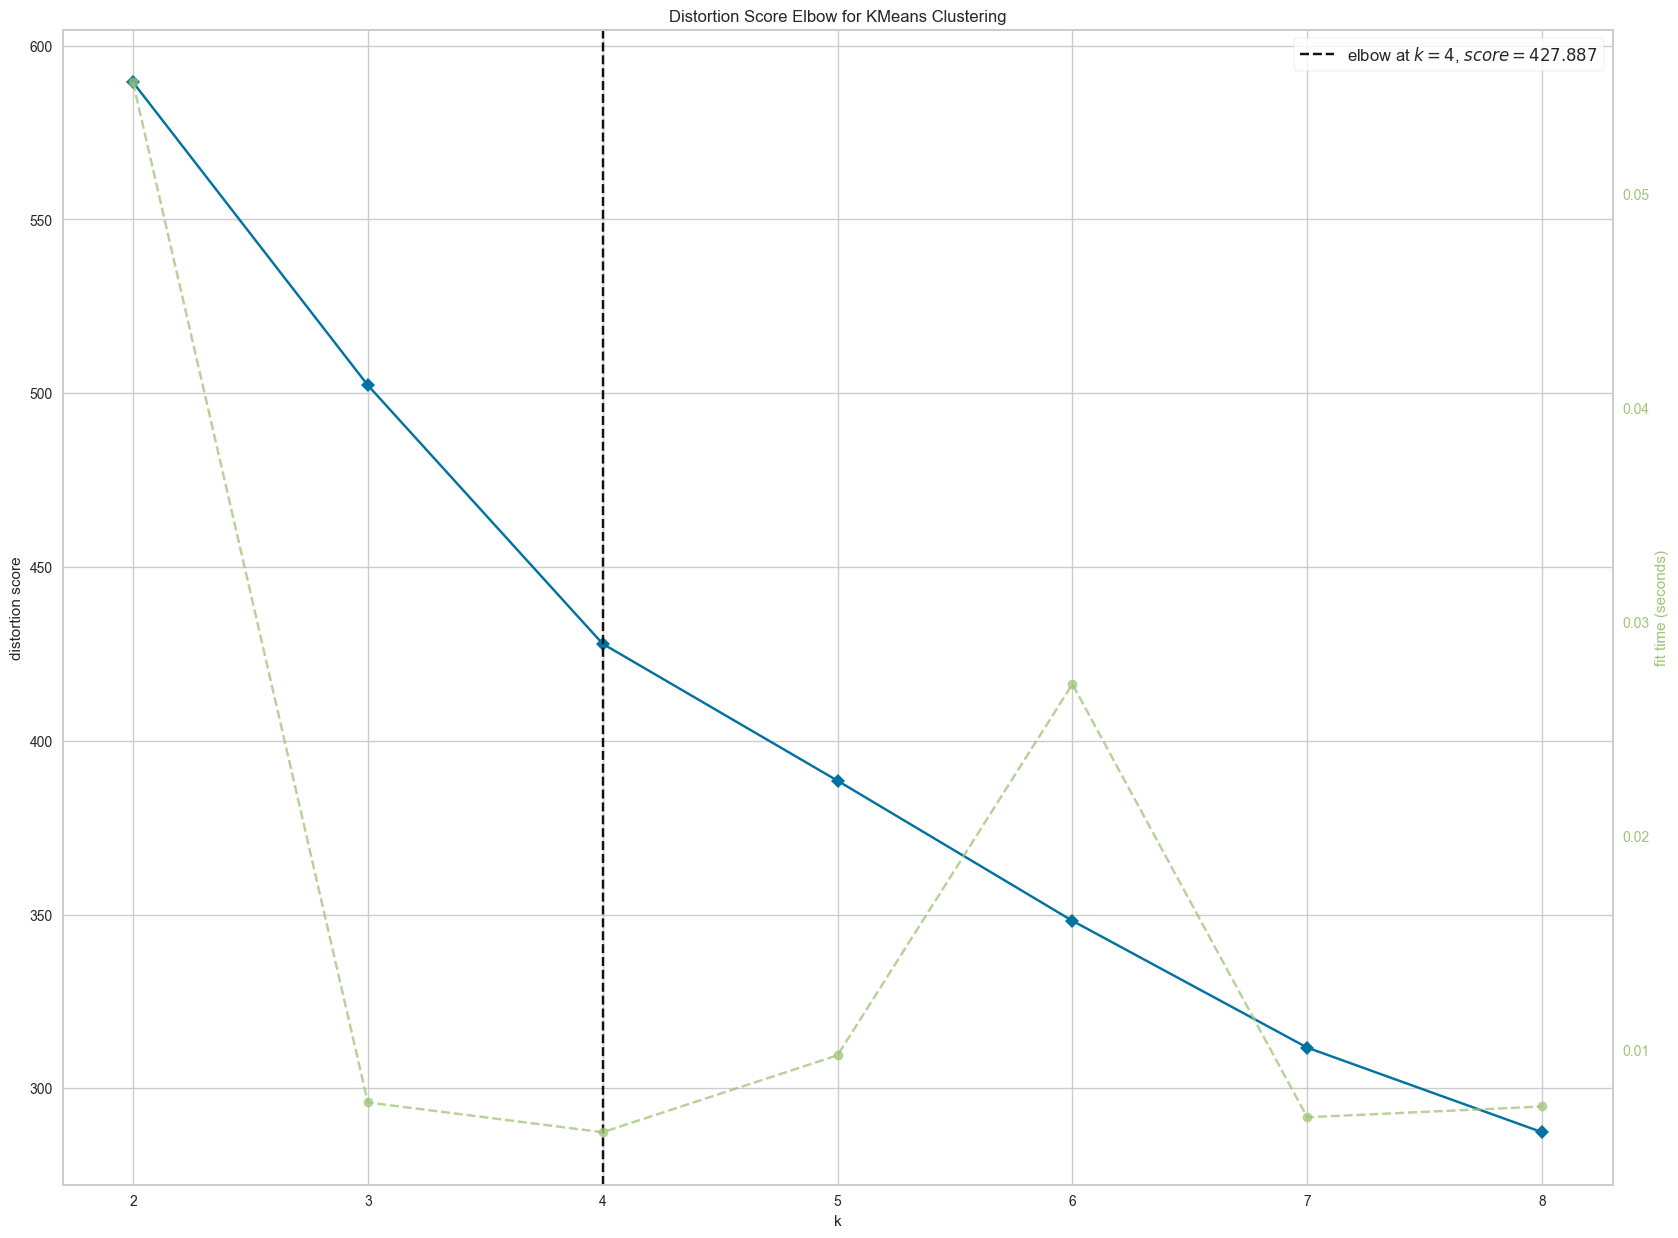

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [187]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



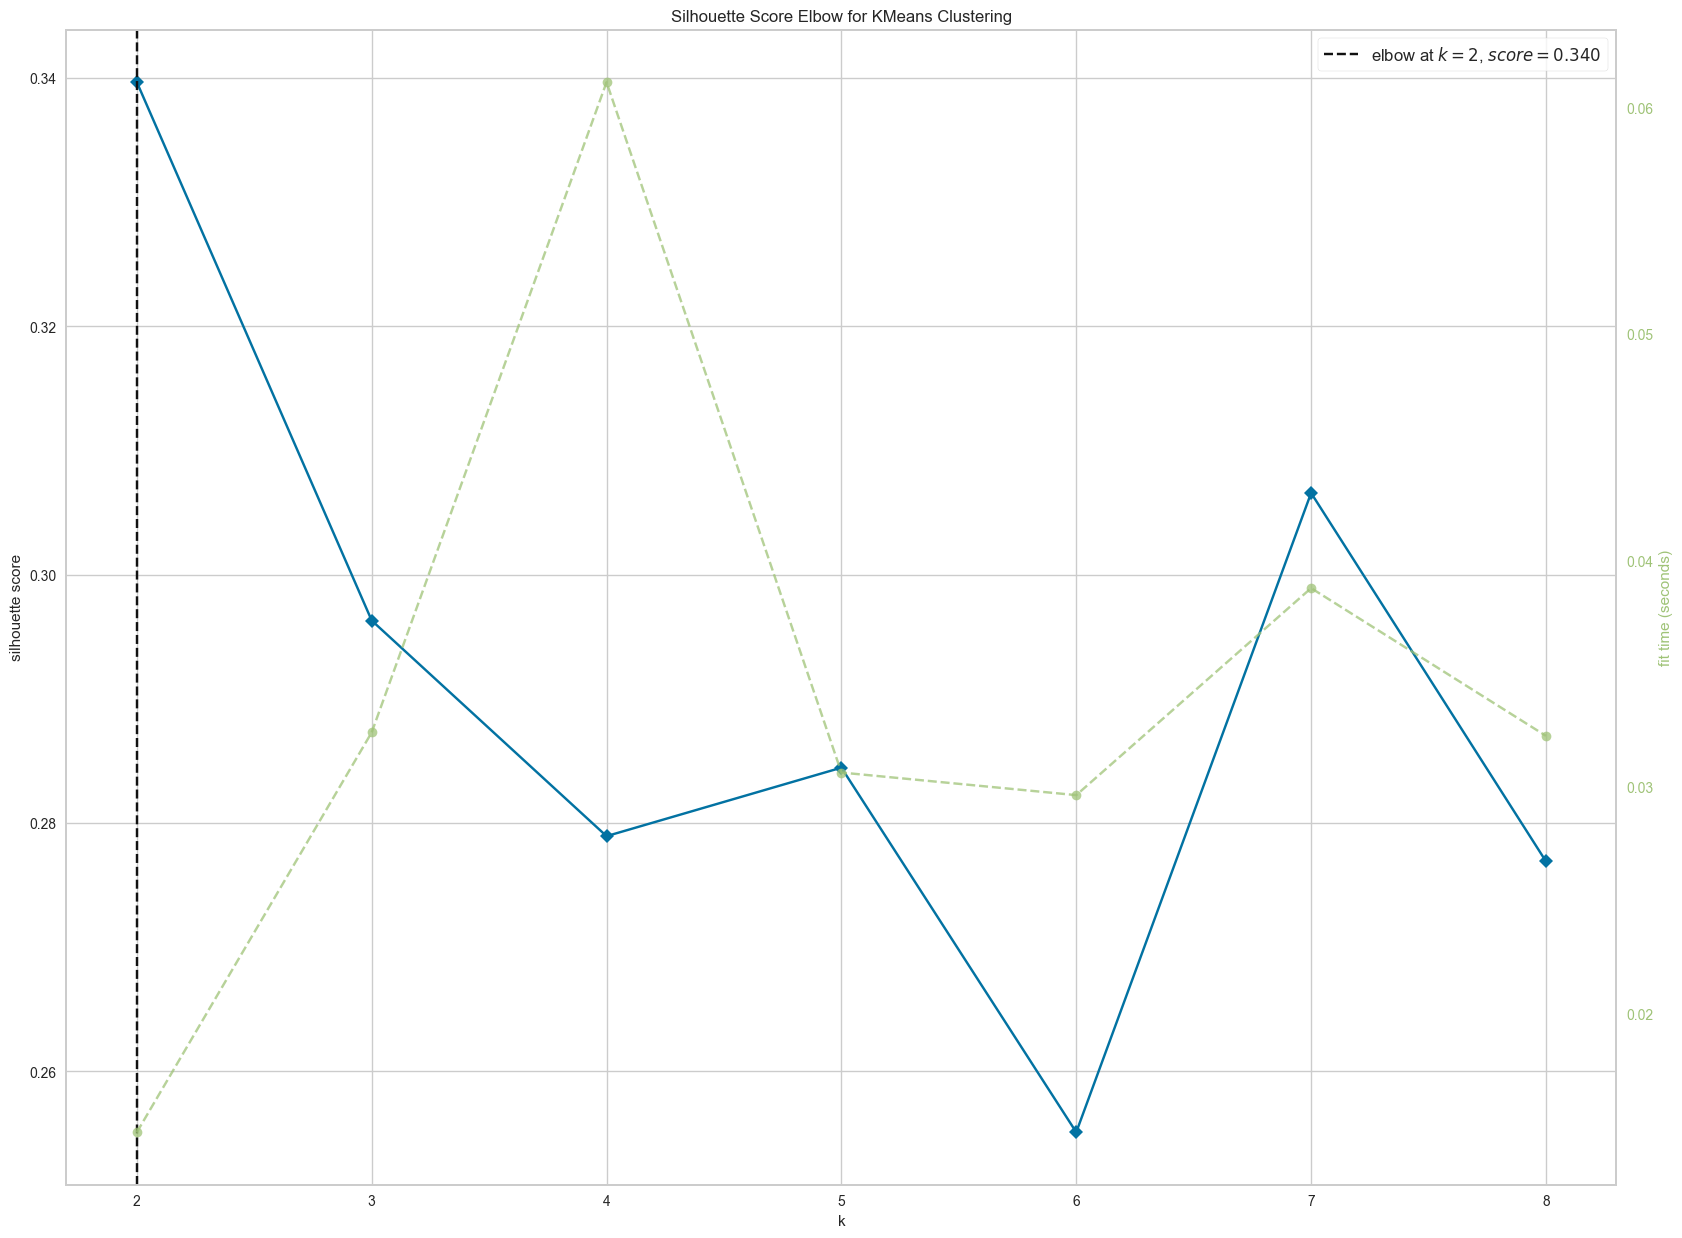

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [188]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



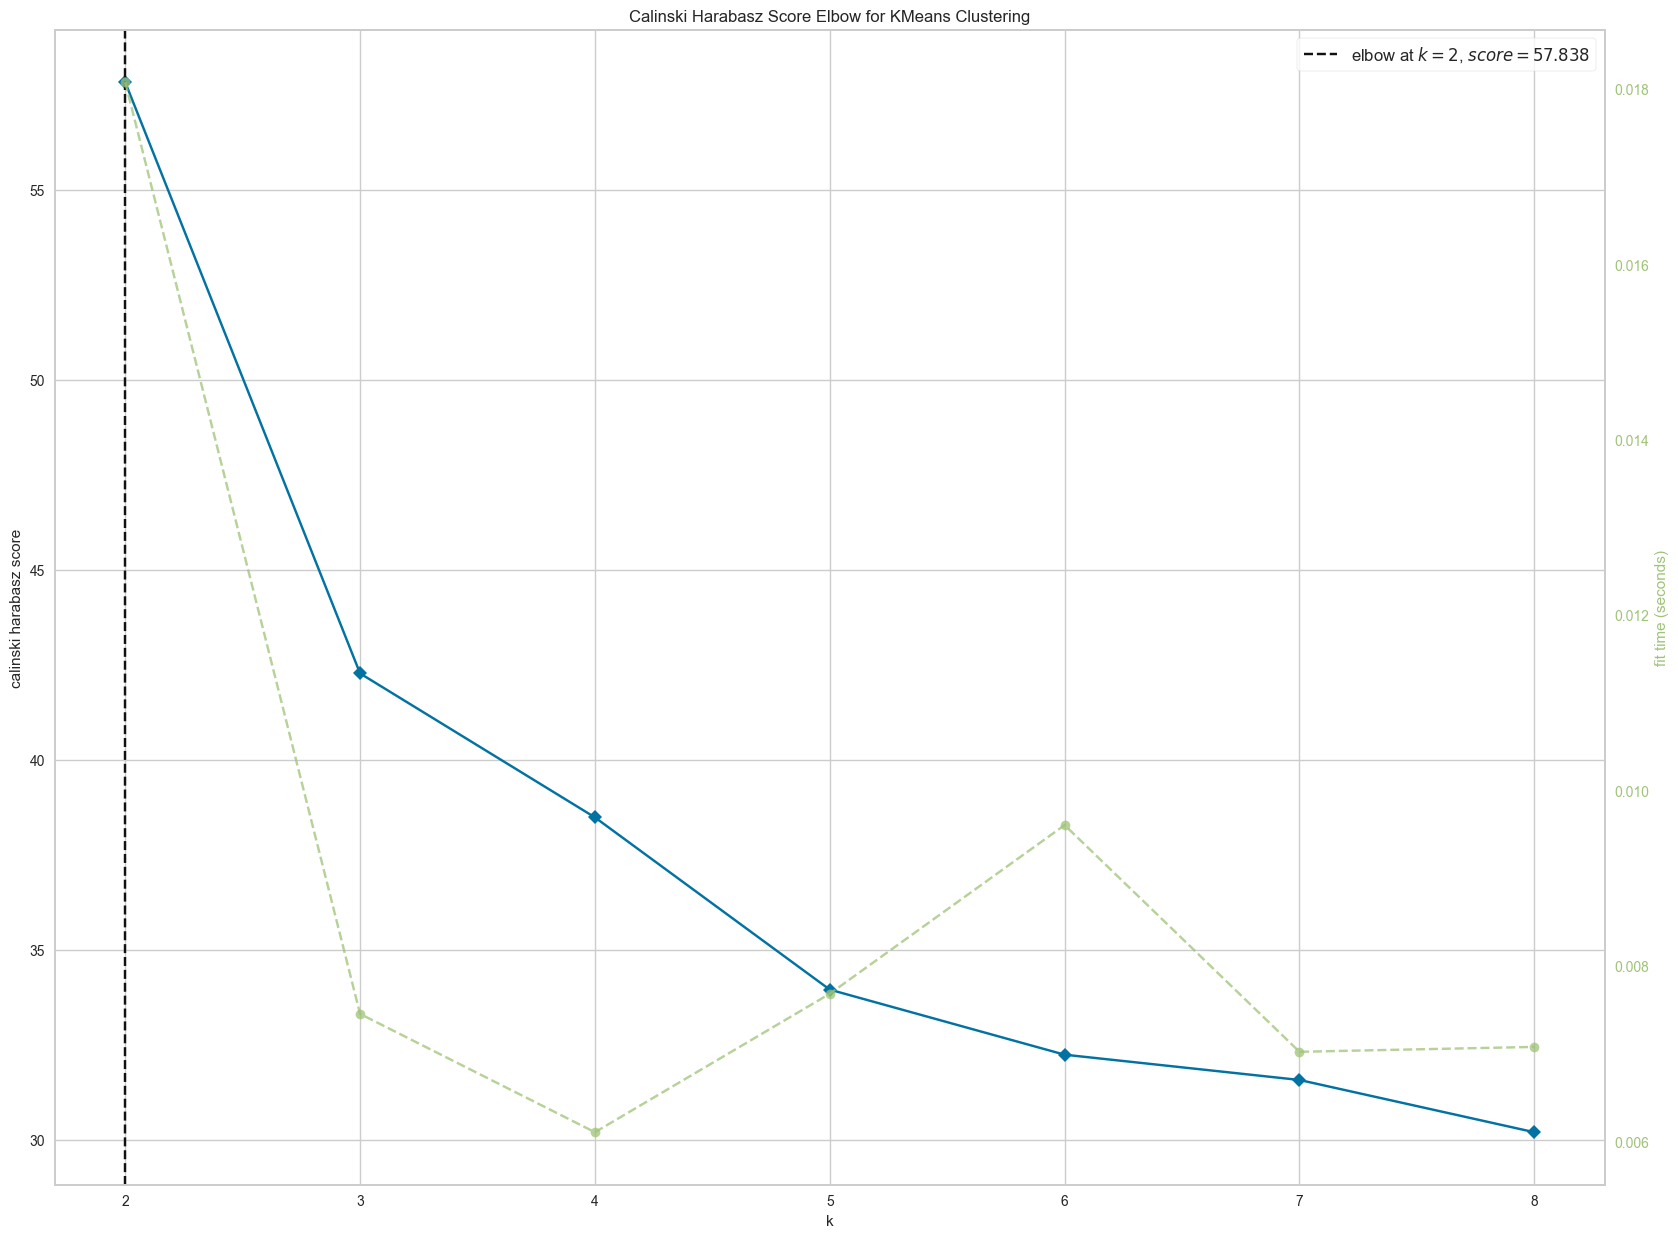

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [112]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [189]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 3 1 0 0 2 3 3 0 1 1 0 0 0 3 0 2 0 3 0 0 2 0 2 2 0 0 1 3 3 1 0 0 1 0 0 0
 3 3 1 2 0 1 0 0 0 0 2 2 3 1 2 0 0 1 0 0 3 0 2 3 2 0 1 3 2 0 1 3 1 0 1 2 1
 0 0 1 3 1 2 0 1 3 0 1 0 1 1 1 0 1 3 3 1 0 0 0 3 0 1 1 1 1]
430.65312527838717
3
[[ 0.40418 -0.53153 -0.52702 -0.4669   0.58109 -0.3764  -0.09927 -0.53147
  -0.66371]
 [-0.57913  0.33981  1.12567  0.3045   0.0878   0.41552  0.55297  0.30158
   0.93919]
 [-1.15321  1.68368 -0.1257   1.65419  0.42762  1.15799 -0.10543  1.70027
   1.07563]
 [ 0.89171 -0.68299 -0.4224  -0.74716 -1.72091 -0.71431 -0.51746 -0.6399
  -0.80103]]


/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [190]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({2: 15, 3: 19, 1: 28, 0: 41})

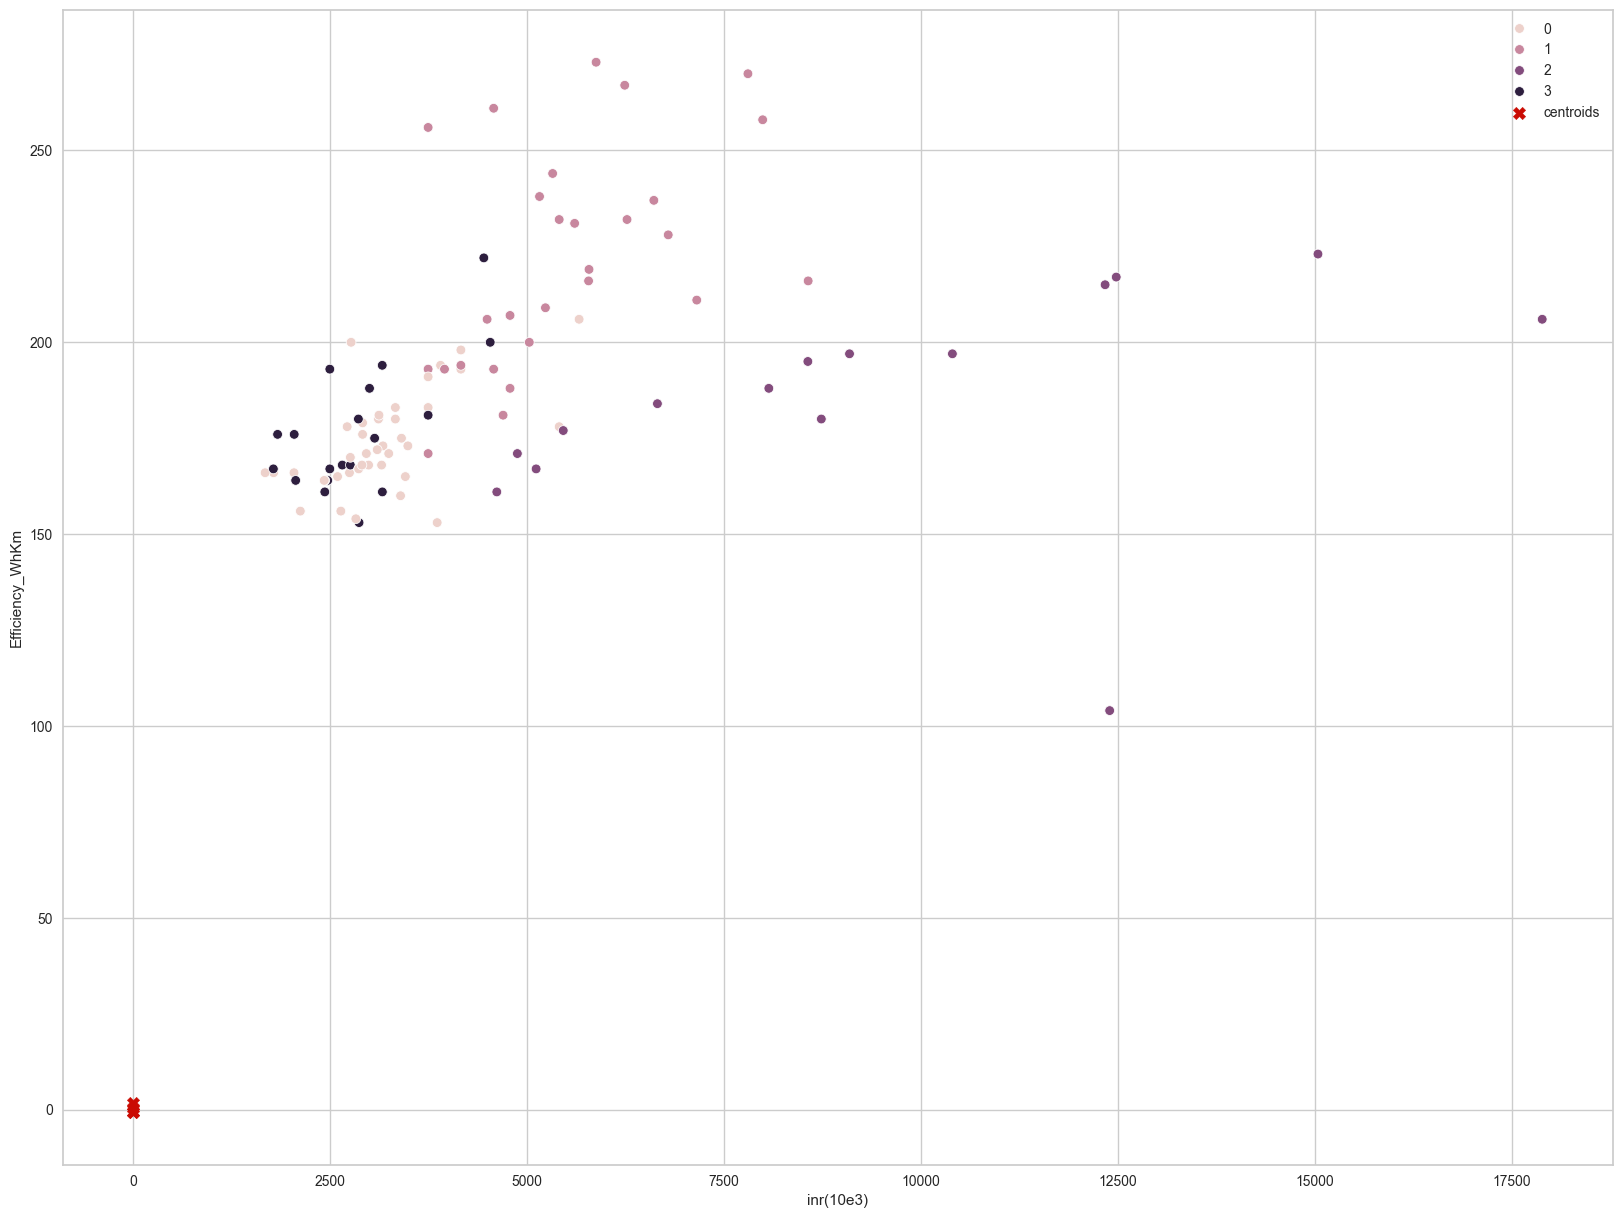

In [211]:
#Visulazing clusters
sb.scatterplot(data=df, x= 'inr(10e3)', y='Efficiency_WhKm', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()